In [3]:
import pickle
with open('surv_dims.pkl', 'rb') as f:
    surv_dims = pickle.load(f)
    

with open('all_data.pkl', 'rb') as f:
    all_data = pickle.load(f)
    
with open('all_ys.pkl', 'rb') as f:
    all_ys = pickle.load(f)

In [2]:
len(all_data)

44

In [3]:
import pandas as pd
data = pd.read_csv('Guess the elbow.csv')
data = data.drop(['Timestamp'], axis=1)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,3,2,2,5,12,2,5,2,3,2,...,2,3,5,6,2,2,2,5,2,3
1,2,3,2,5,10,2,5,2,4,2,...,3,8,5,7,2,2,3,5,2,8
2,1,1,1,4,12,1,5,1,5,1,...,1,8,4,7,1,2,1,5,1,2
3,2,3,2,5,5,2,5,2,5,1,...,3,8,5,7,2,2,2,5,2,8


In [5]:
true = [int(x) for x in list(data.median(axis = 0))]

Using the basic error caluculation $\frac{Expected - True}{True}$

In [67]:
import numpy as np
error = []
for k in range(data.shape[0]): 
    c = [(j-i)/i if i != 0 else None for i,j in zip(true, data.iloc[k])]
    error.append(c)
error = np.asarray(error)  

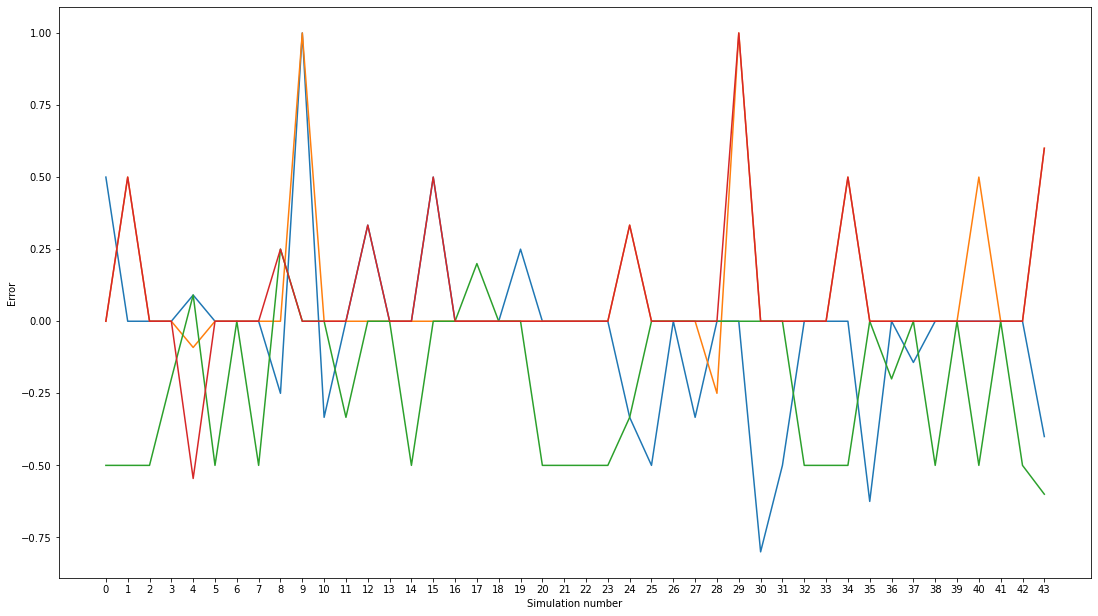

In [77]:
from matplotlib import pyplot as plt
for i in range(data.shape[0]):
    plt.plot([j for j in range(data.shape[1])], error[i])
plt.xticks([j for j in range(data.shape[1])])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel("Simulation number")
plt.ylabel("Error")
plt.show()

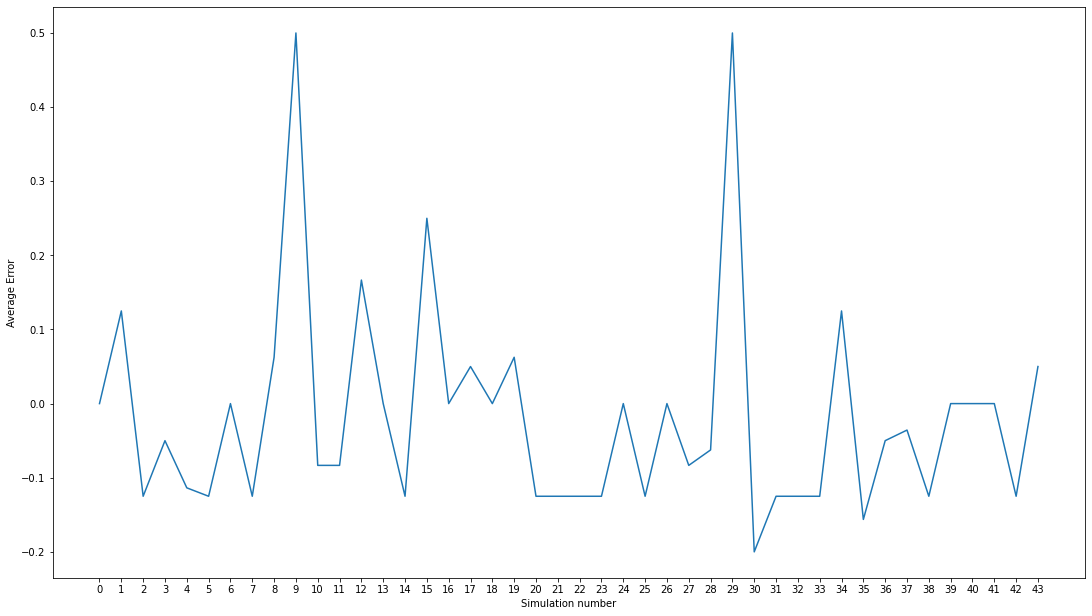

In [82]:
plt.plot([j for j in range(data.shape[1])], np.mean(error, axis=0))
plt.xticks([j for j in range(data.shape[1])])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel("Simulation number")
plt.ylabel("Average Error")
plt.show()

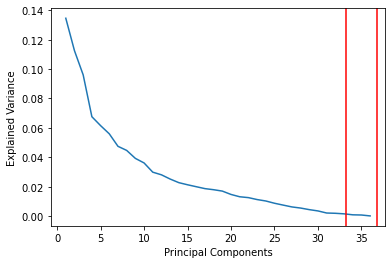

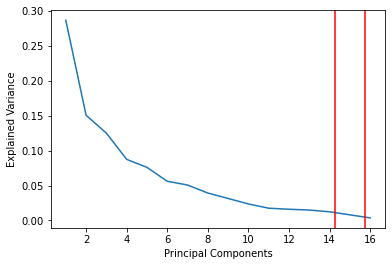

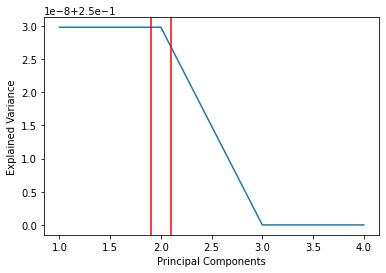

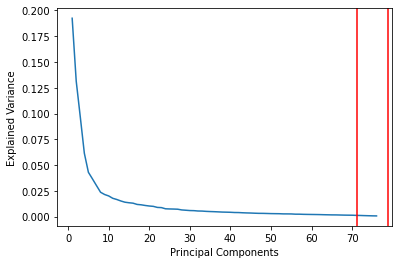

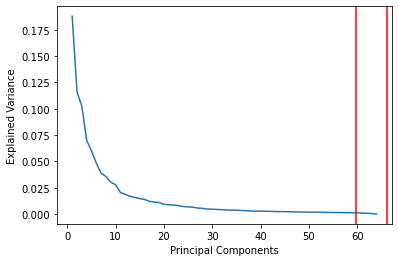

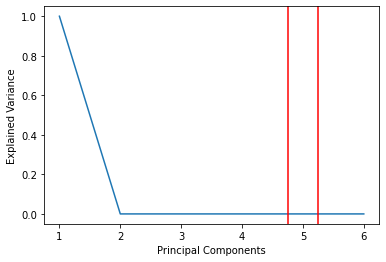

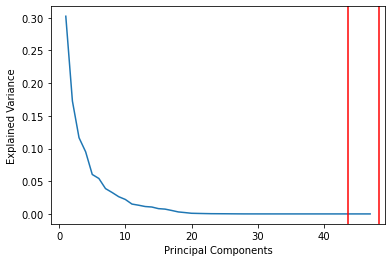

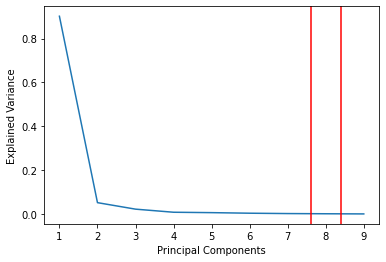

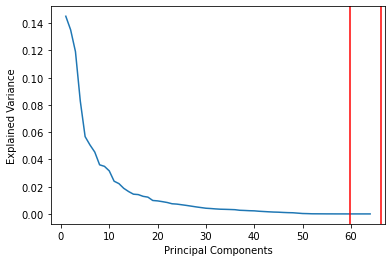

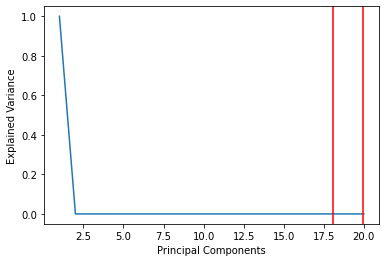

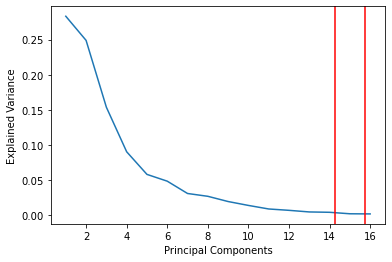

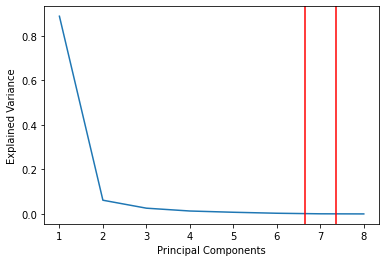

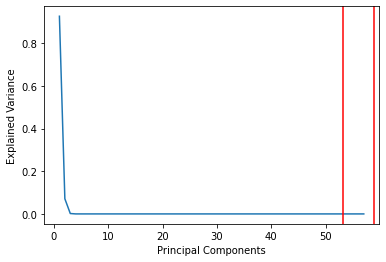

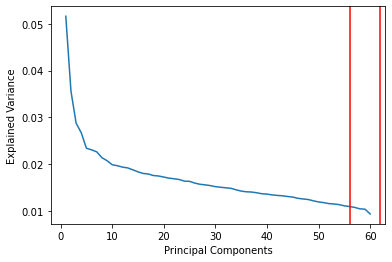

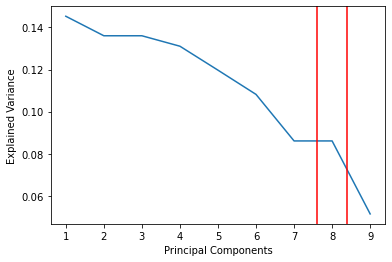

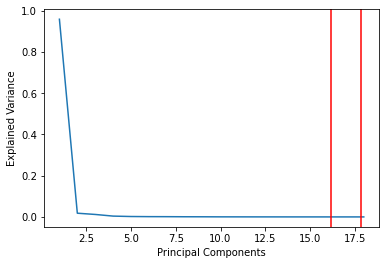

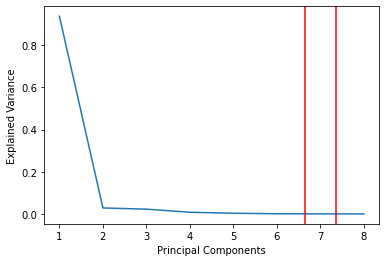

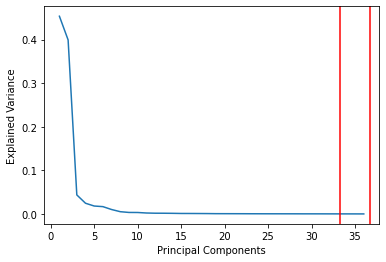

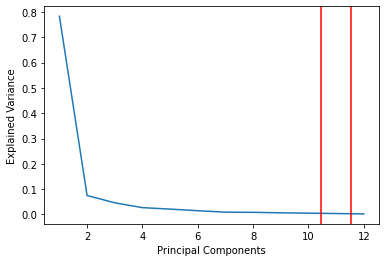

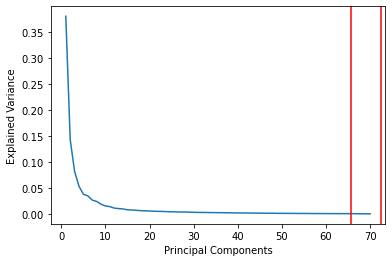

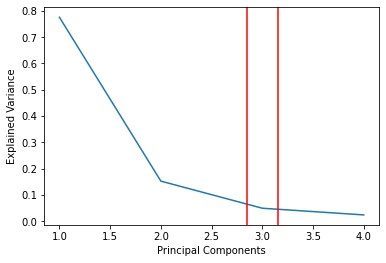

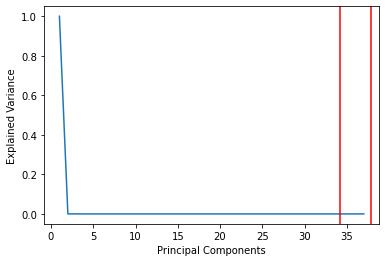

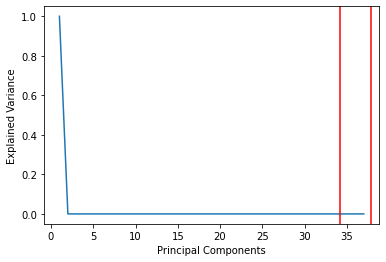

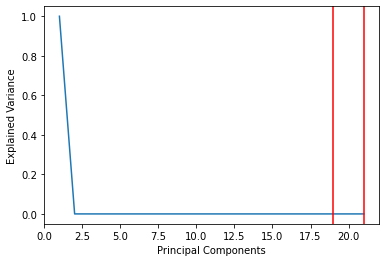

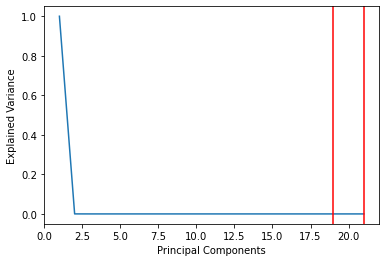

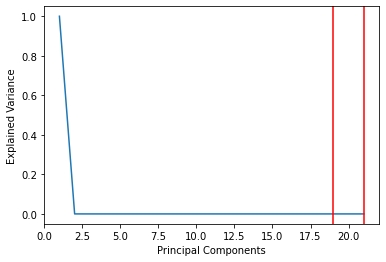

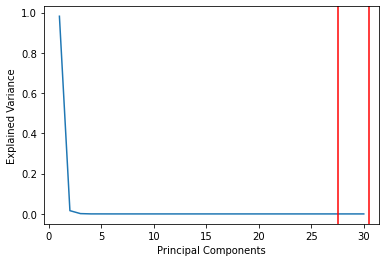

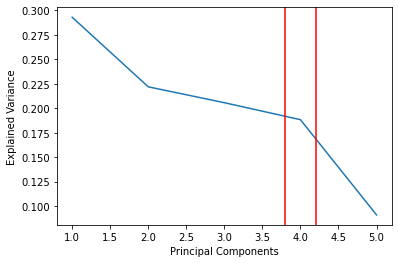

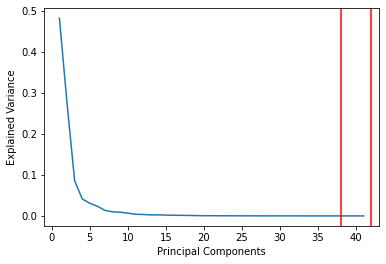

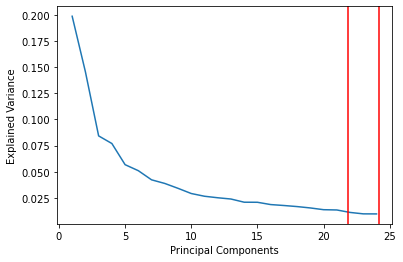

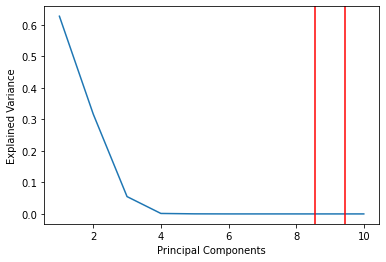

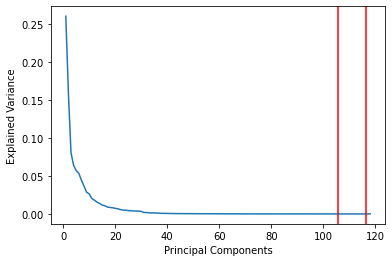

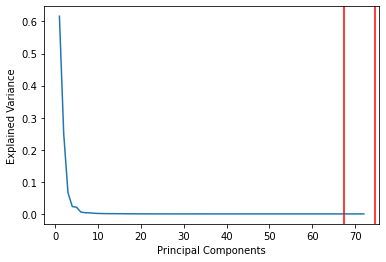

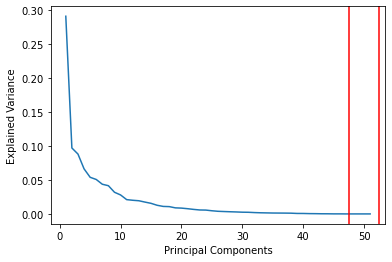

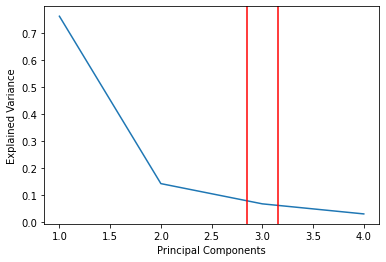

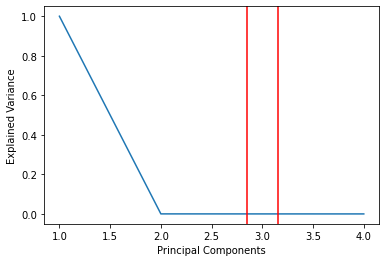

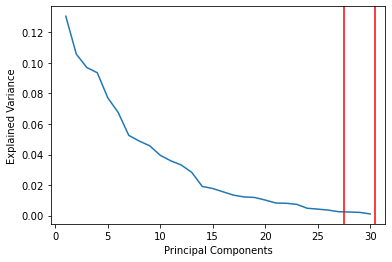

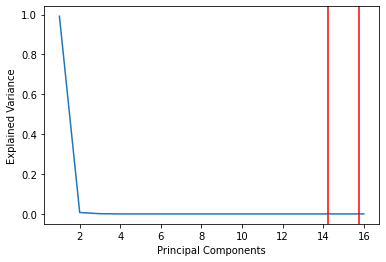

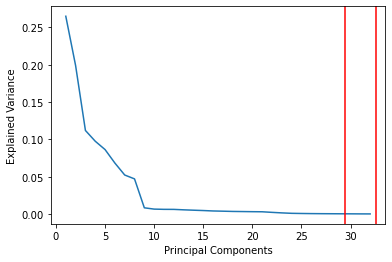

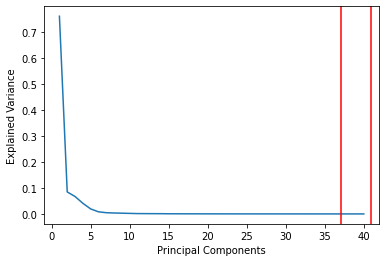

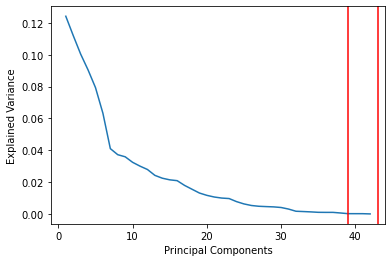

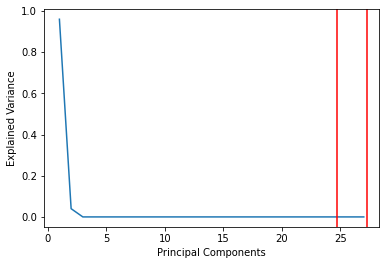

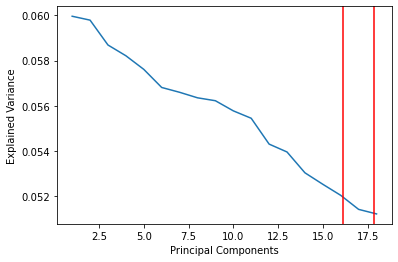

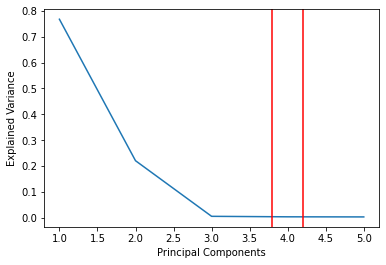

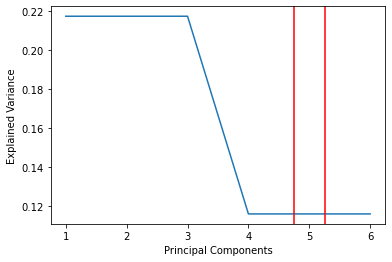

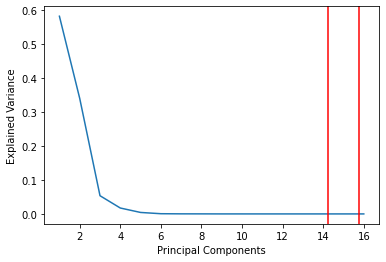

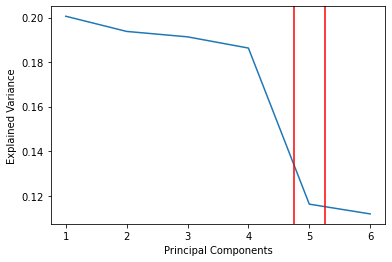

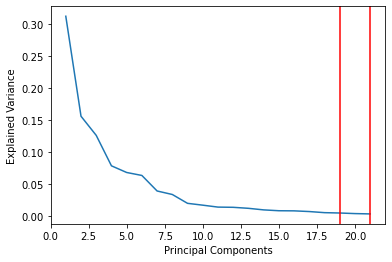

In [9]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
mins = []
counter = 0
for A in all_data:
    pca = PCA(n_components=min(A.shape[1], A.shape[0]))
    pca.fit(A)
    plt.plot([i for i in range(1, A.shape[1] + 1)], pca.explained_variance_ratio_)
    plt.xlabel("Principal Components")
    plt.ylabel("Explained Variance")
   
    m = list(pca.explained_variance_ratio_).index(min(pca.explained_variance_ratio_))
    plt.axvline(x= m*1.05, color='r', linestyle='-')
    plt.axvline(x= m*.95, color='r', linestyle='-')
    plt.show()
    counter += 1
    


In [5]:
mins

[35,
 15,
 2,
 75,
 63,
 5,
 46,
 8,
 63,
 19,
 15,
 7,
 56,
 59,
 8,
 17,
 7,
 35,
 11,
 69,
 3,
 36,
 36,
 20,
 20,
 20,
 29,
 4,
 40,
 23,
 9,
 111,
 71,
 50,
 3,
 3,
 29,
 15,
 31,
 39,
 41,
 26,
 17,
 4,
 5,
 15,
 5,
 20]

Basic walk through

first fit PCA with d = n (the number of cols in input array)

Then run LDA on that embedded data using the PCA version of A and the y from original data set

MIsscalssification rate vs dimension plot? 

Then show how each elbow sleection did in comparison to this

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

all_miss = []
for i in range(len(all_data)):
    pca = PCA(n_components=min(all_data[i].shape[1], all_data[i].shape[0]))
    b = pca.fit_transform(all_data[i])
    X_train, X_test, y_train, y_test = train_test_split(b, all_ys[i], test_size=0.33, random_state=42)
    miss_per_dim = []
    for j in range(X_train.shape[1]):
        clf = LDA()
        clf.fit(X_train[:, :j+1], y_train)
        pred = clf.predict(X_test[:, :j+1])
        miss_per_dim.append(np.mean(pred != y_test))
    all_miss.append(miss_per_dim)

In [5]:
len(all_miss)

44

In [13]:
l = [3, 2, 1]

In [14]:
l.sort()
print(l)

[1, 2, 3]


In [31]:
import seaborn as sns
import numpy as np
colors = sns.color_palette()    
def scree_2(miss, ds):
    sns.lineplot(x = np.arange(len(miss)), y = miss)
    if max(miss) > .5:
        plt.ylim(0, max(miss) + .1) 
    else:
        plt.ylim(0, .5)
    locs = []
    added = set()
    for i in range(len(ds)):
        noise = 0
        if ds[i] in added:
            while(abs(noise) < .1 ):
                noise = np.random.normal(.1, .2)
            added.add(ds[i])
        locs.append(ds[i] + noise)
    plt.axvline(locs[0], label='ZG(1):{}'.format(ds[0]), color=colors[0], ls='--', zorder =  1)
    plt.axvline(locs[1], label='ZG(2):{}'.format(ds[1]), color=colors[0], ls=':', zorder =  1)
    plt.axvline(locs[2], label='minka:{}'.format(ds[2]), color=colors[1], ls='--', zorder =  1)
    plt.axvline(locs[3], label='ZG_hack(1):{}'.format(ds[3]), color= colors[2], ls='--', zorder =  1)
    plt.axvline(locs[4], label='ZG_hack(2):{}'.format(ds[4]), color=colors[2], ls=':', zorder =  1)
    plt.title("Missclassification rate per PCA dimension(d = N)")
    plt.xlabel("Dimension")
    plt.ylabel("Missclassification rate")
    fig = plt.gcf()    
    fig.set_size_inches(18.5, 10.5)
    plt.xticks(np.arange(len(miss)))
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',)
    plt.show()
    plt.clf()

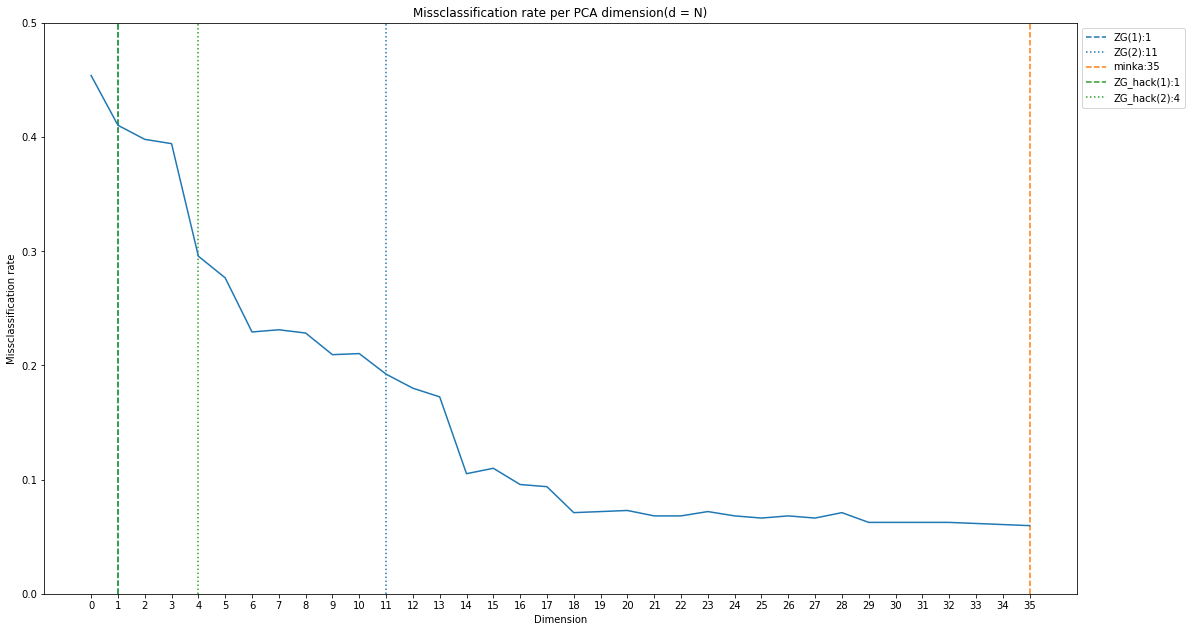

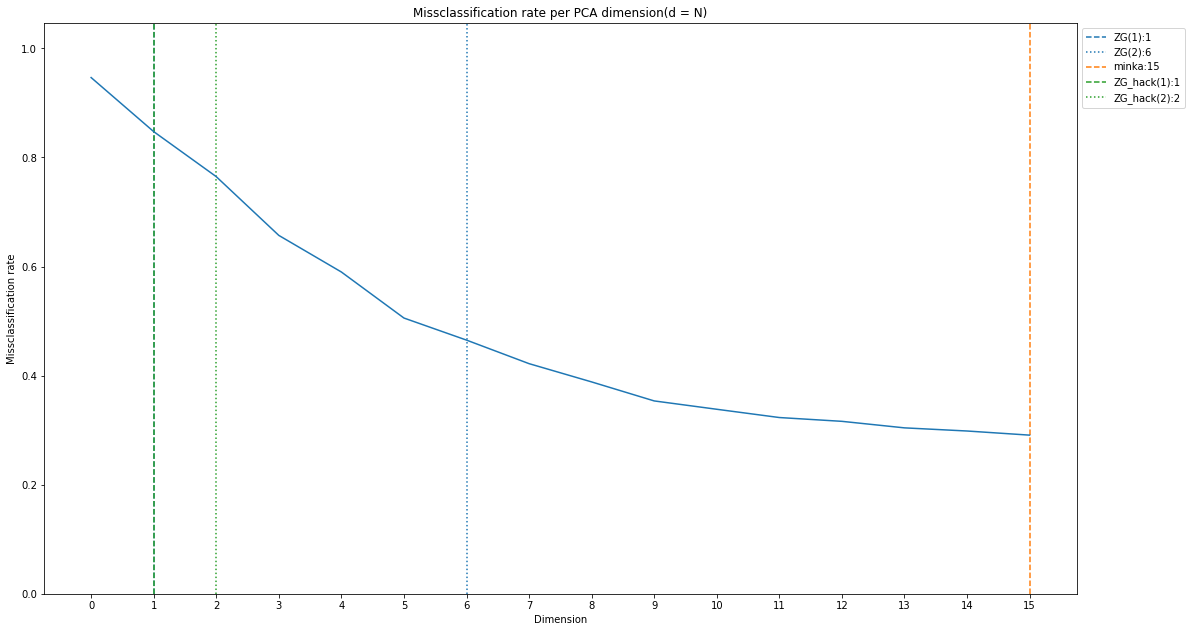

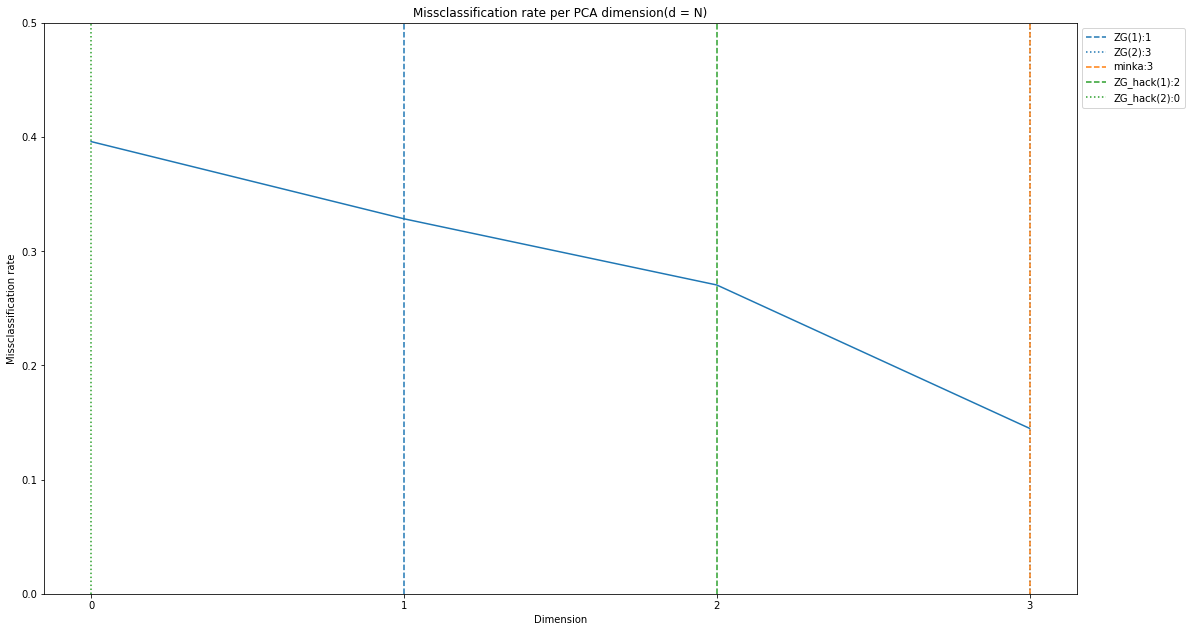

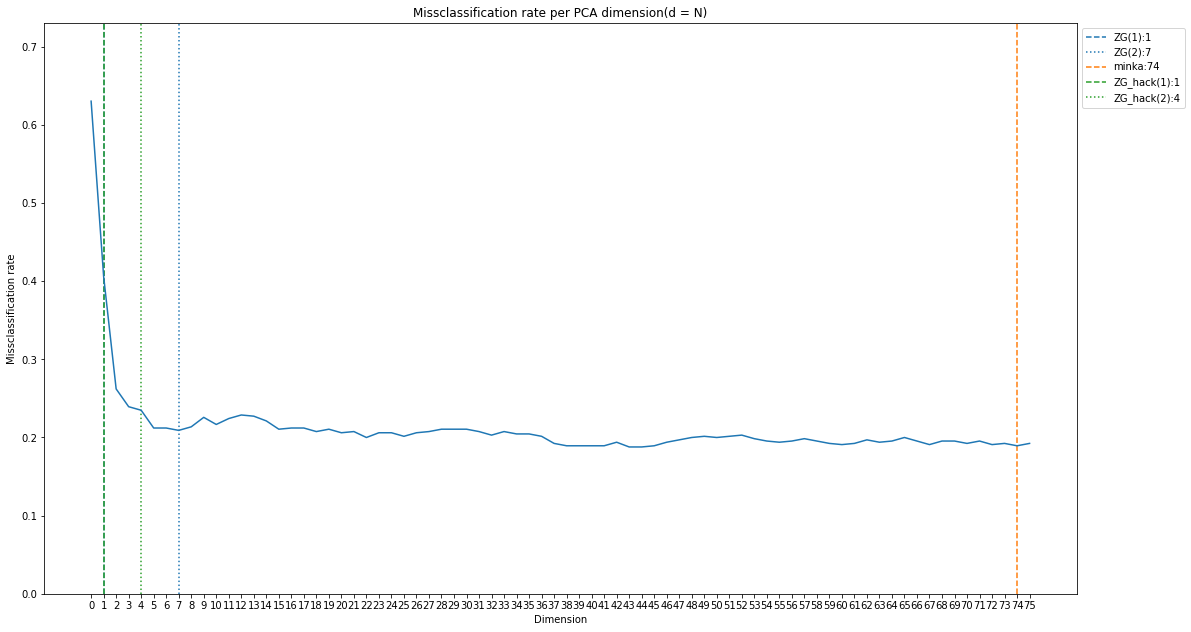

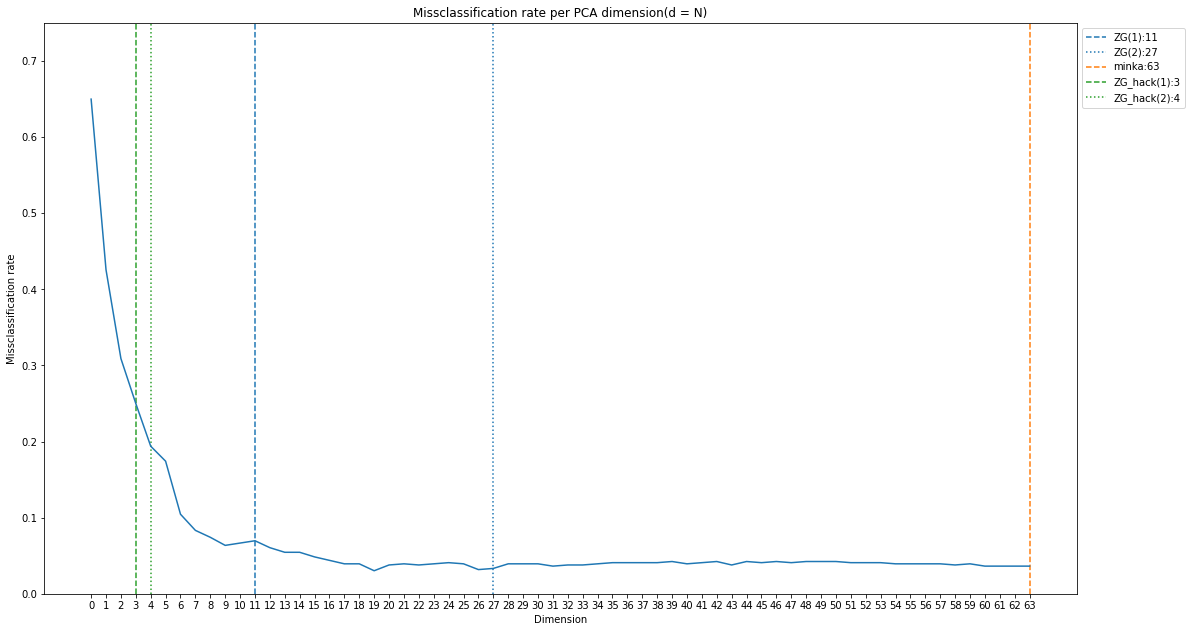

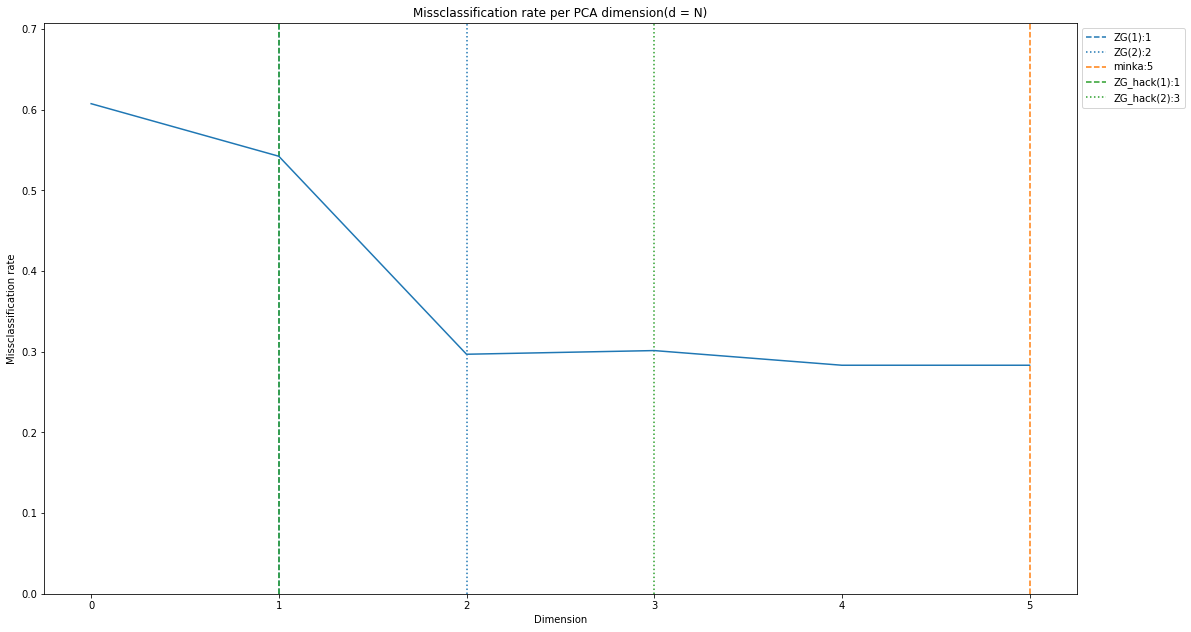

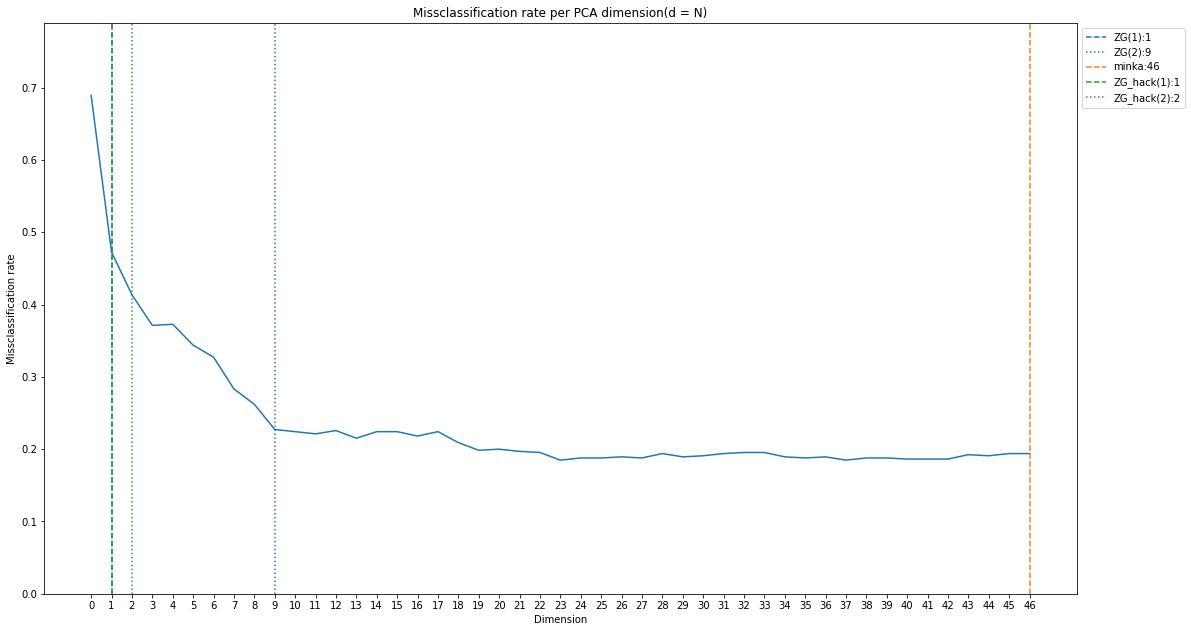

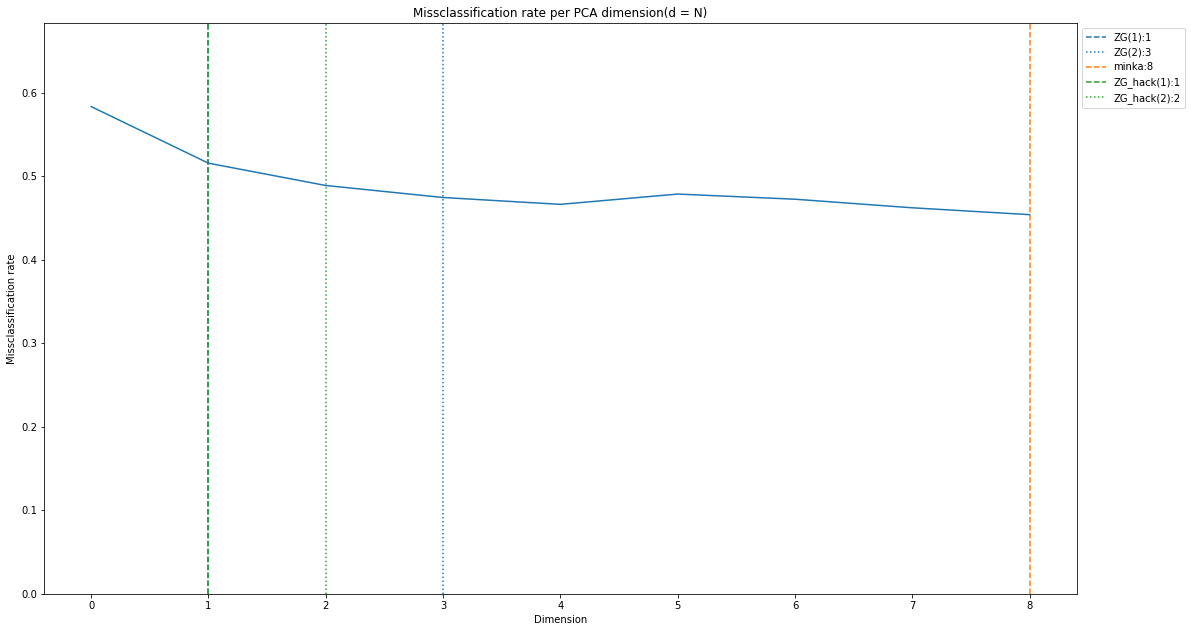

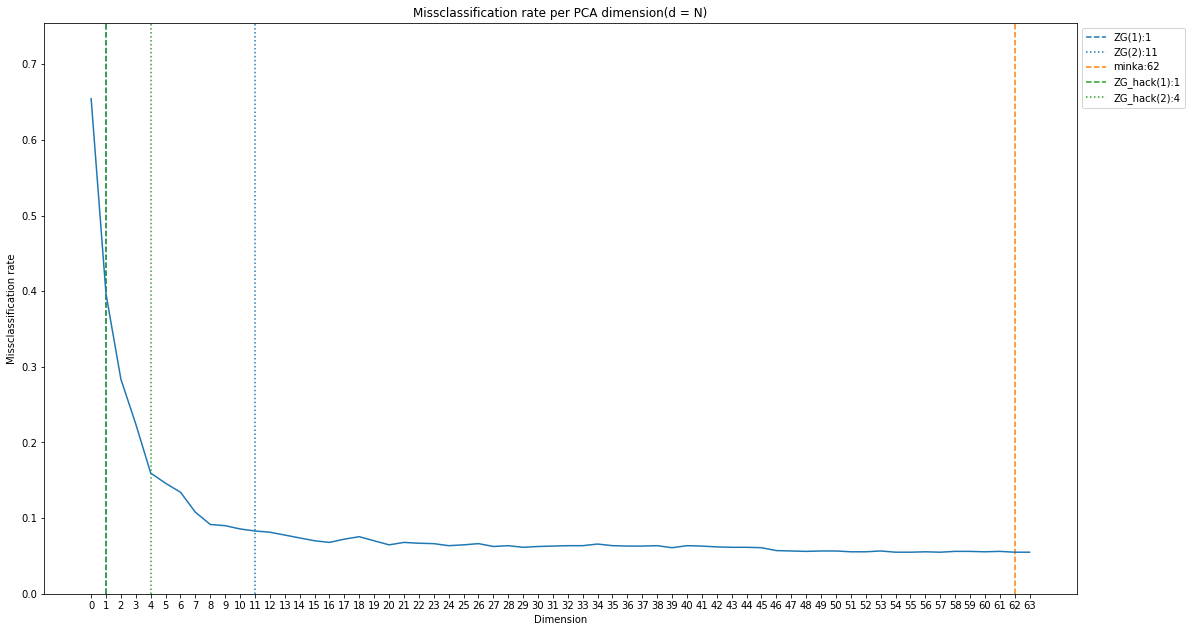

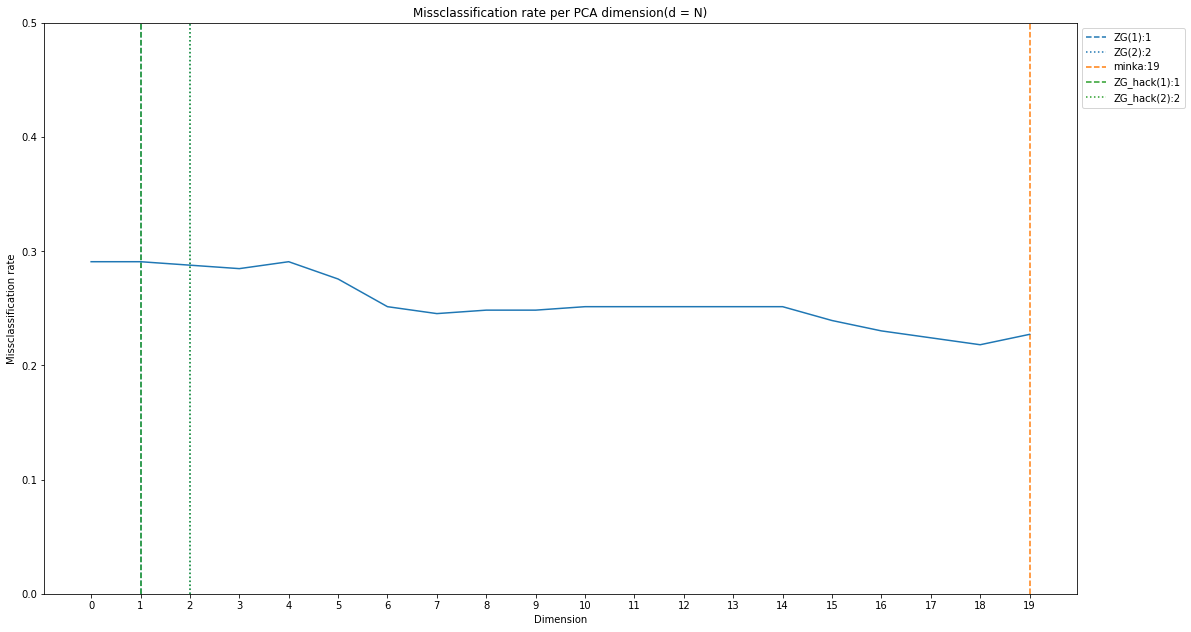

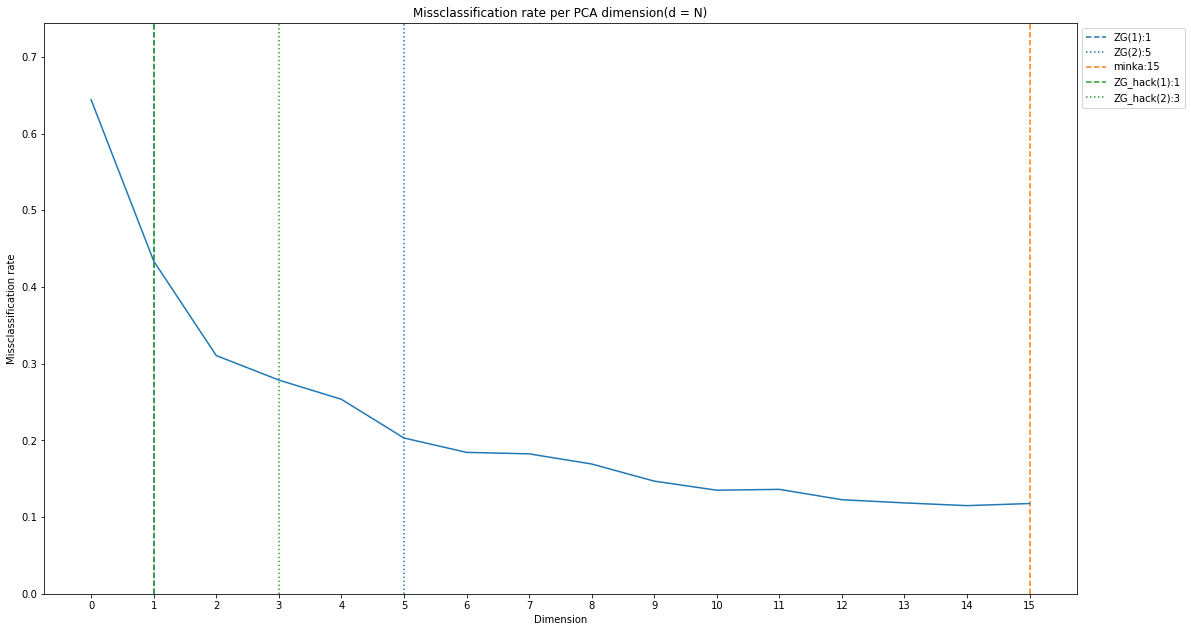

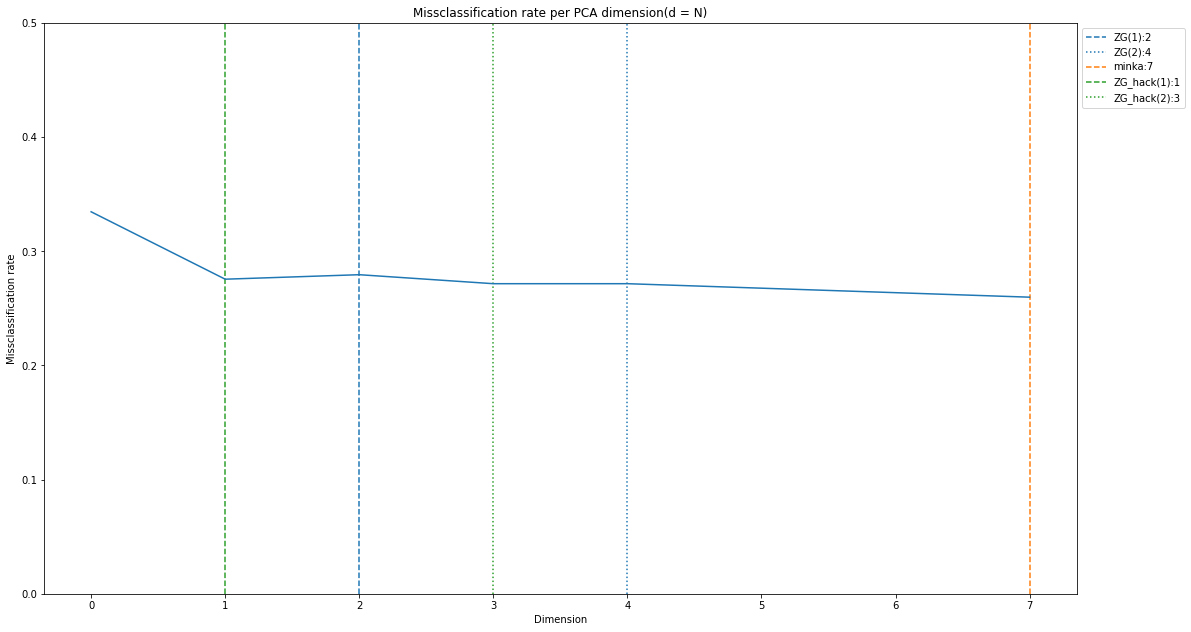

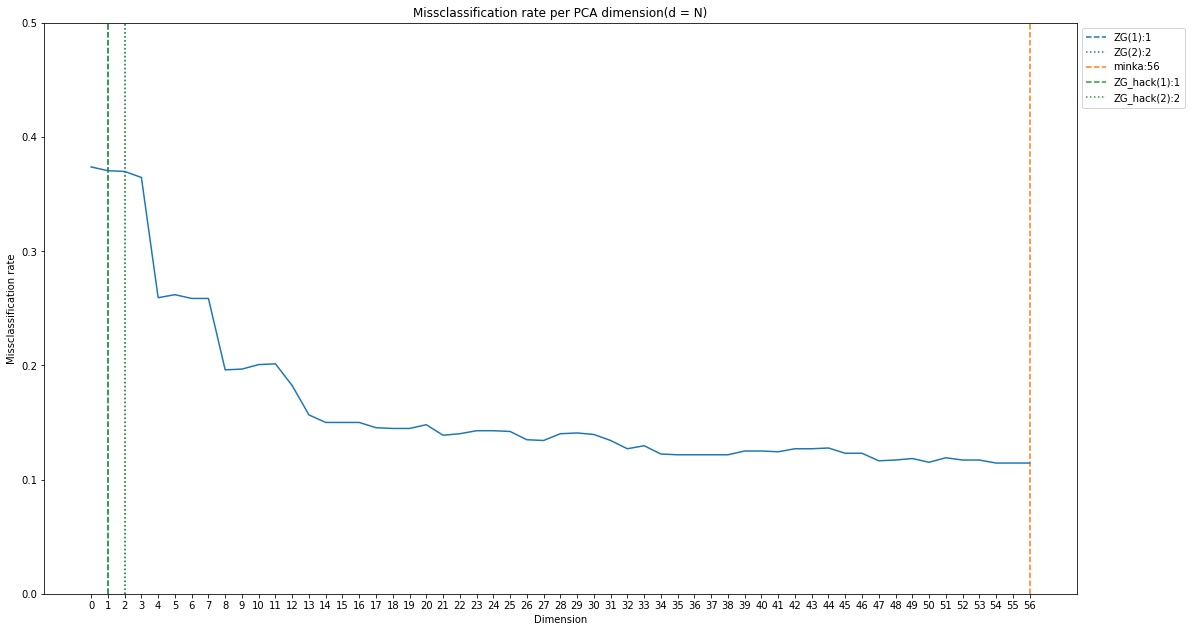

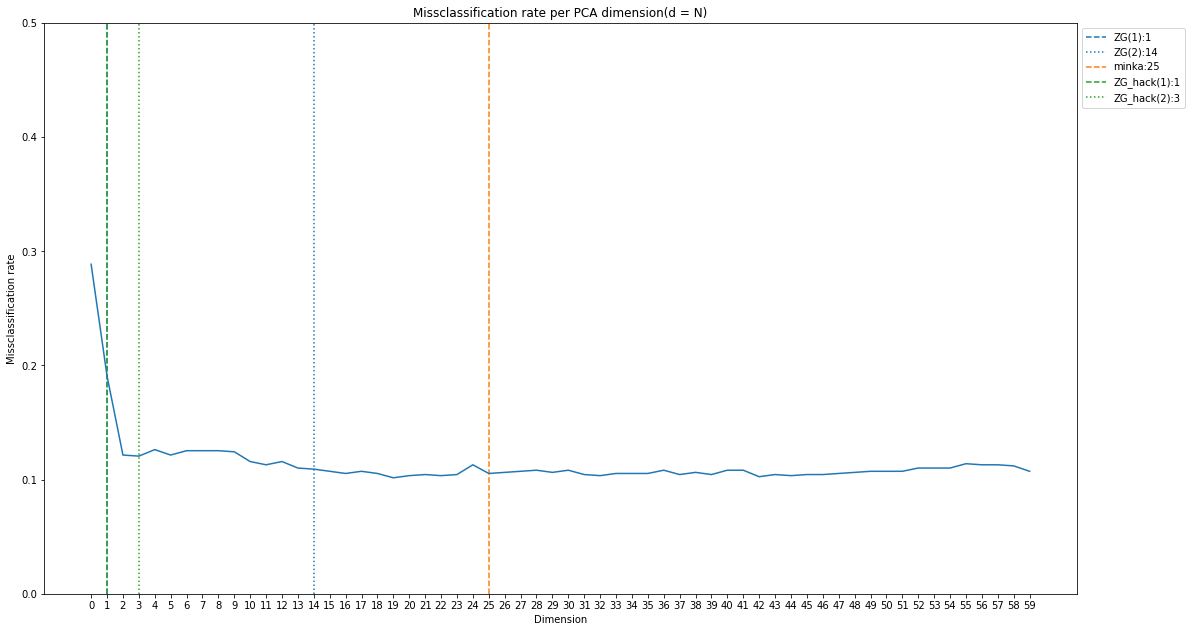

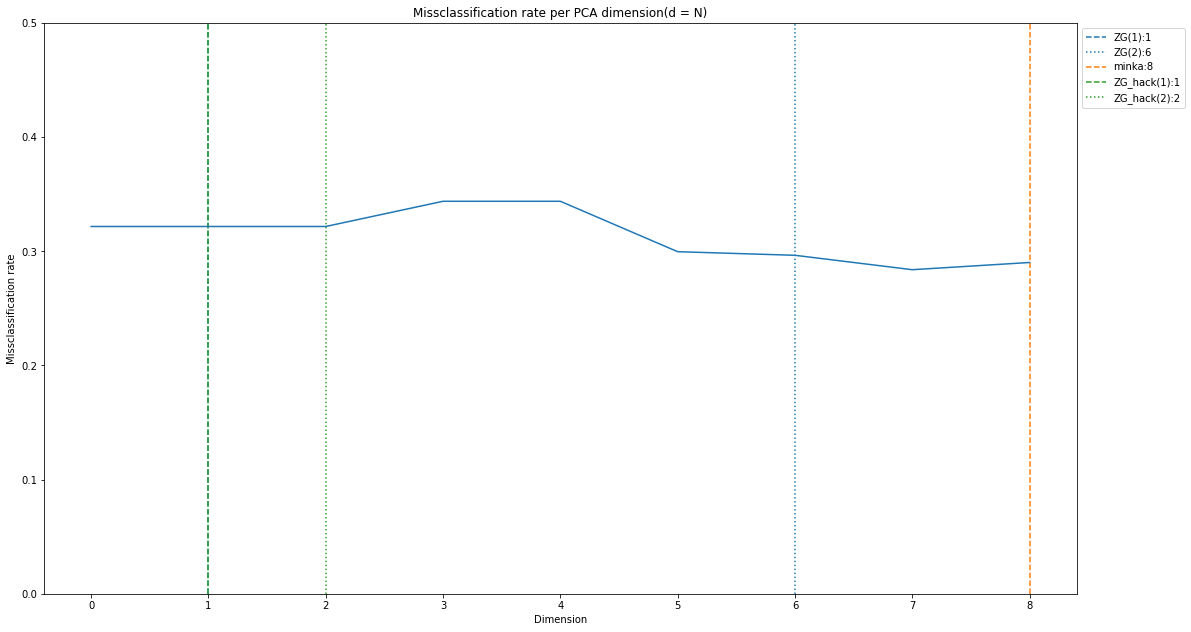

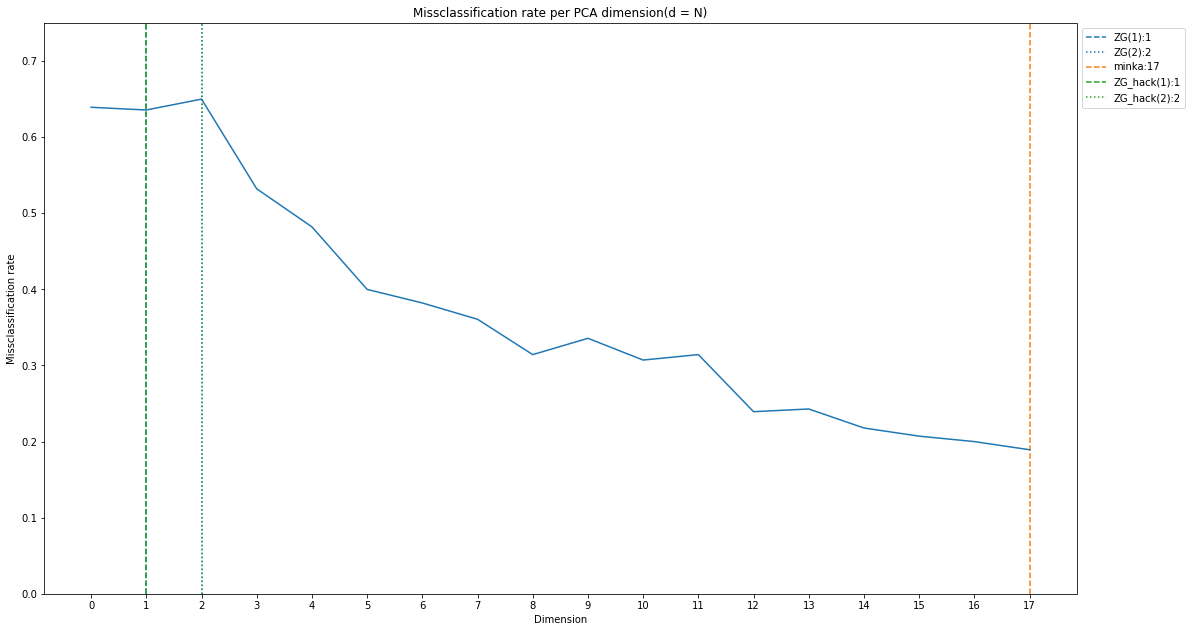

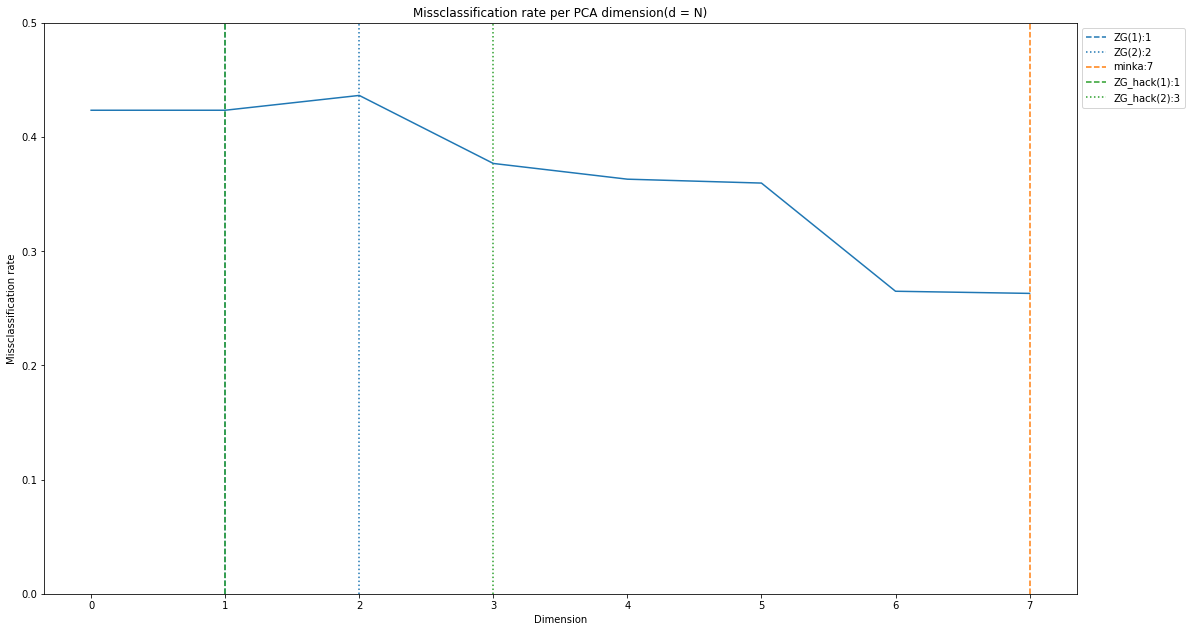

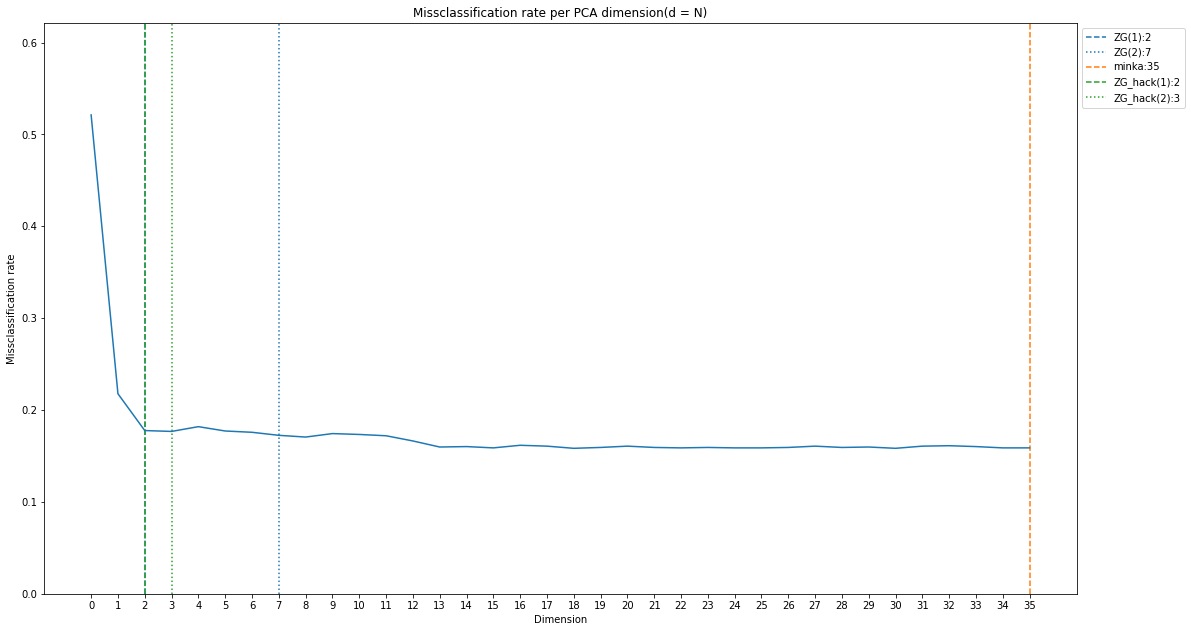

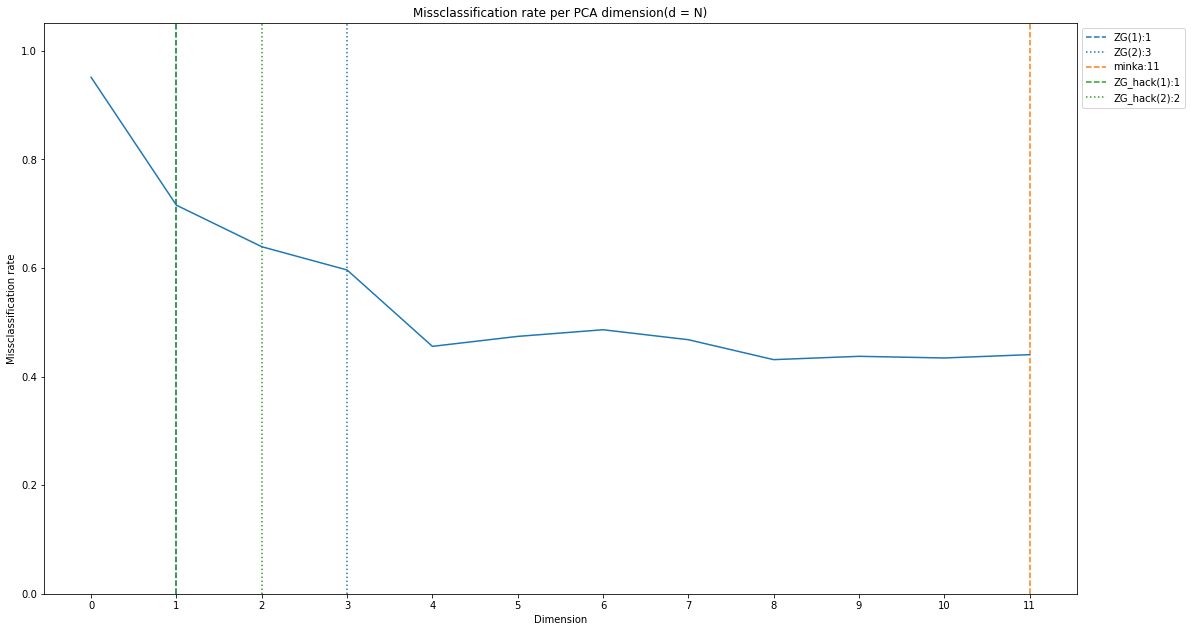

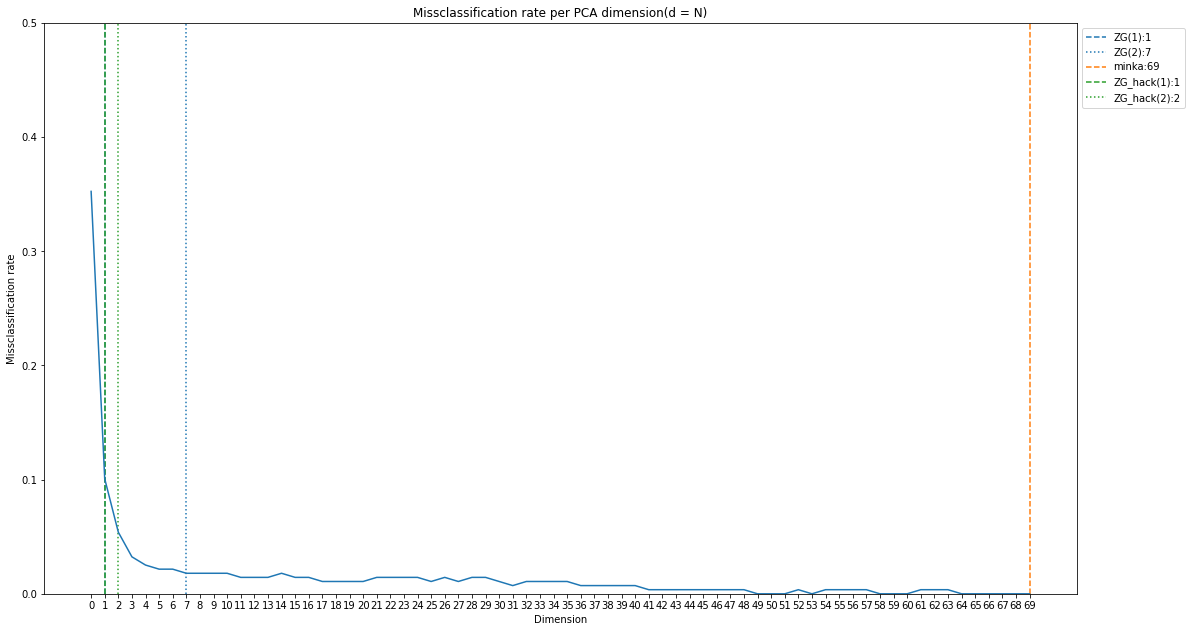

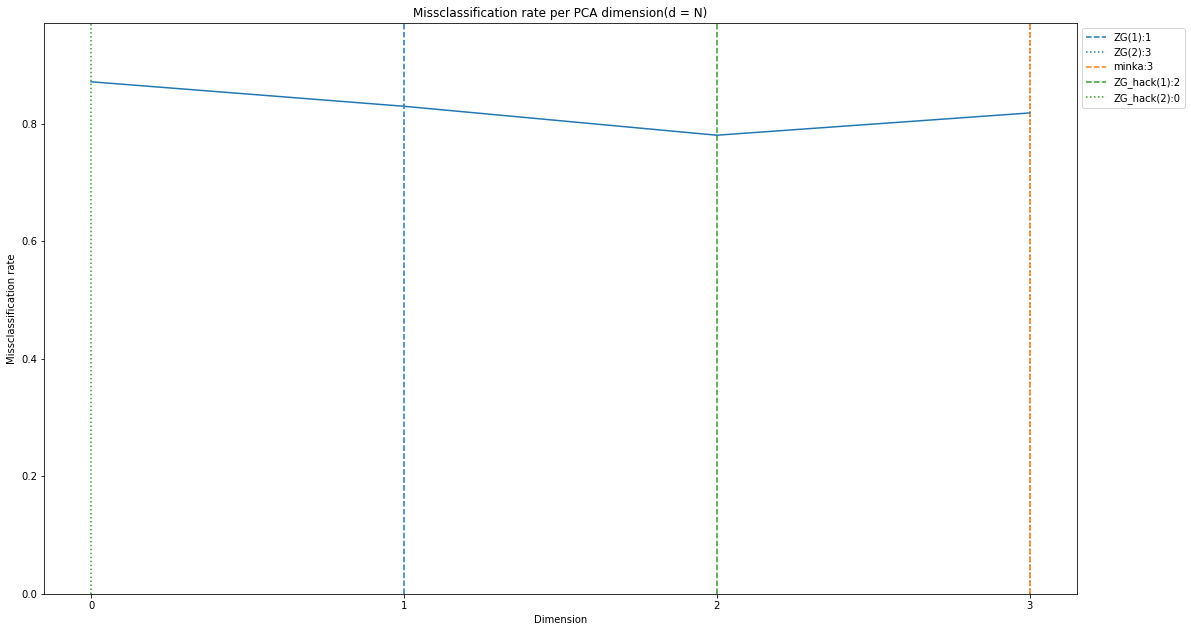

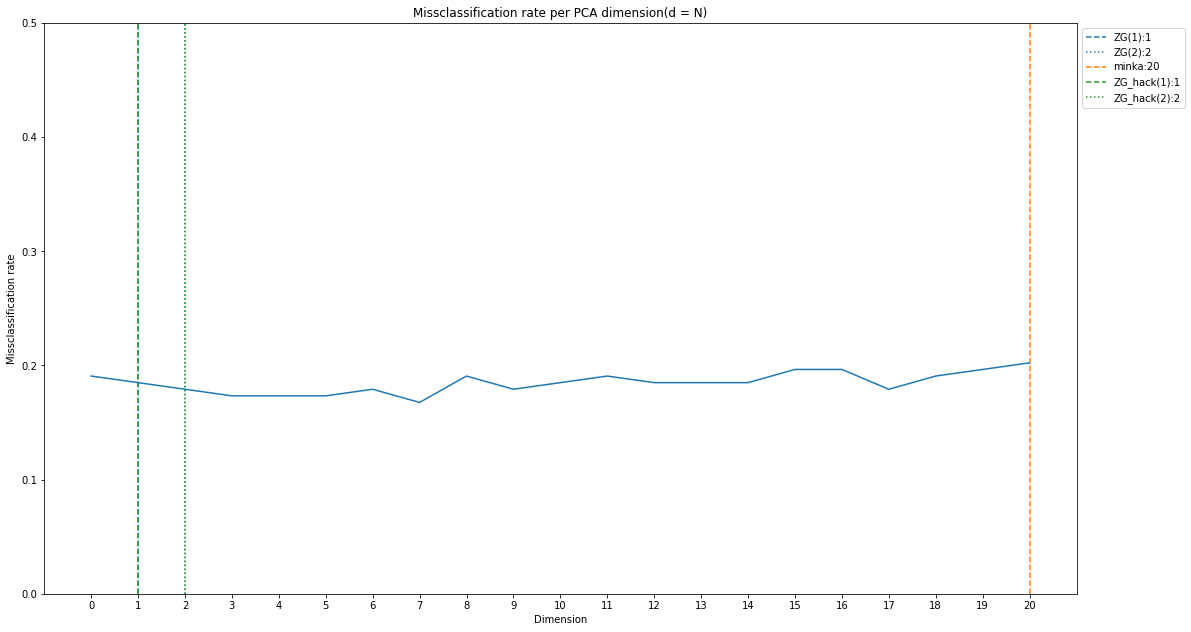

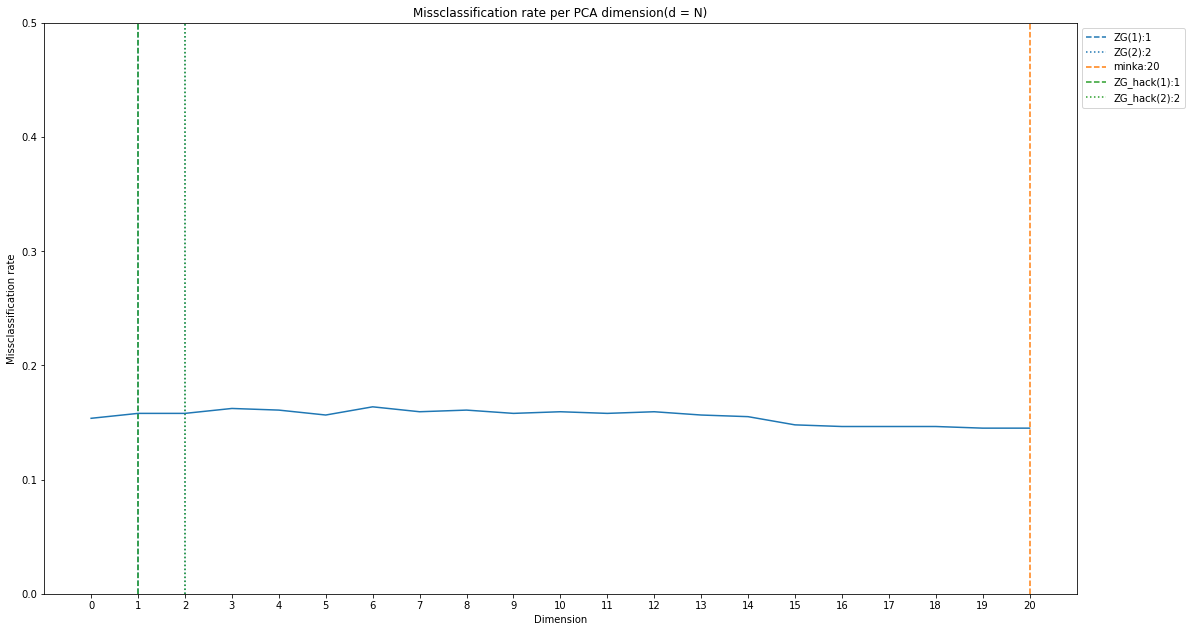

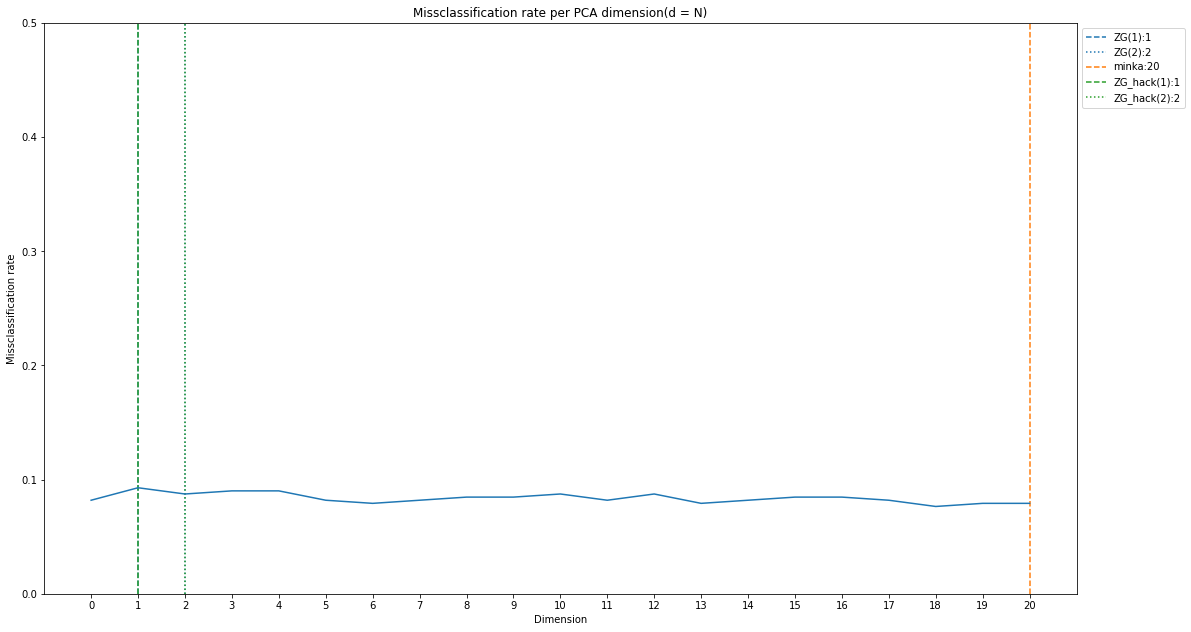

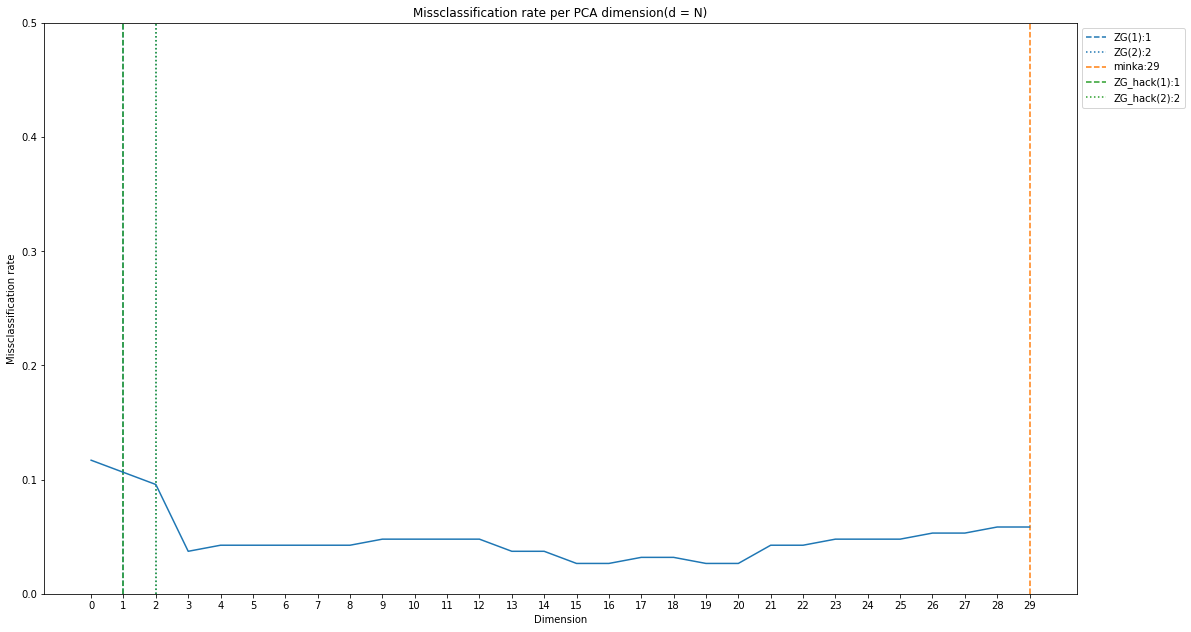

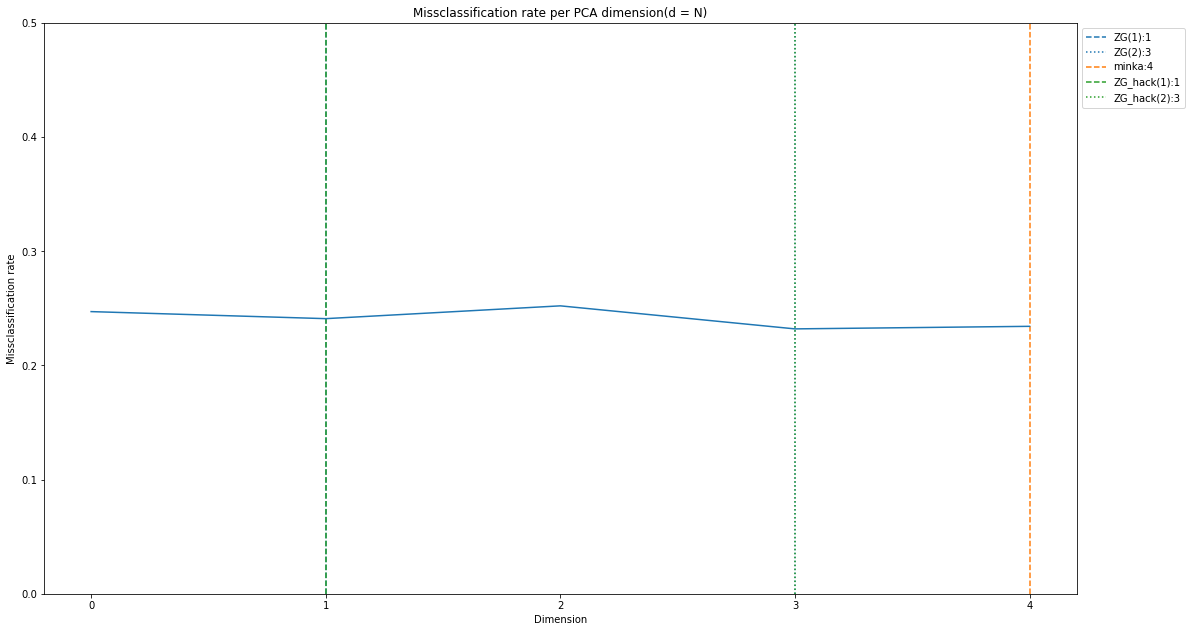

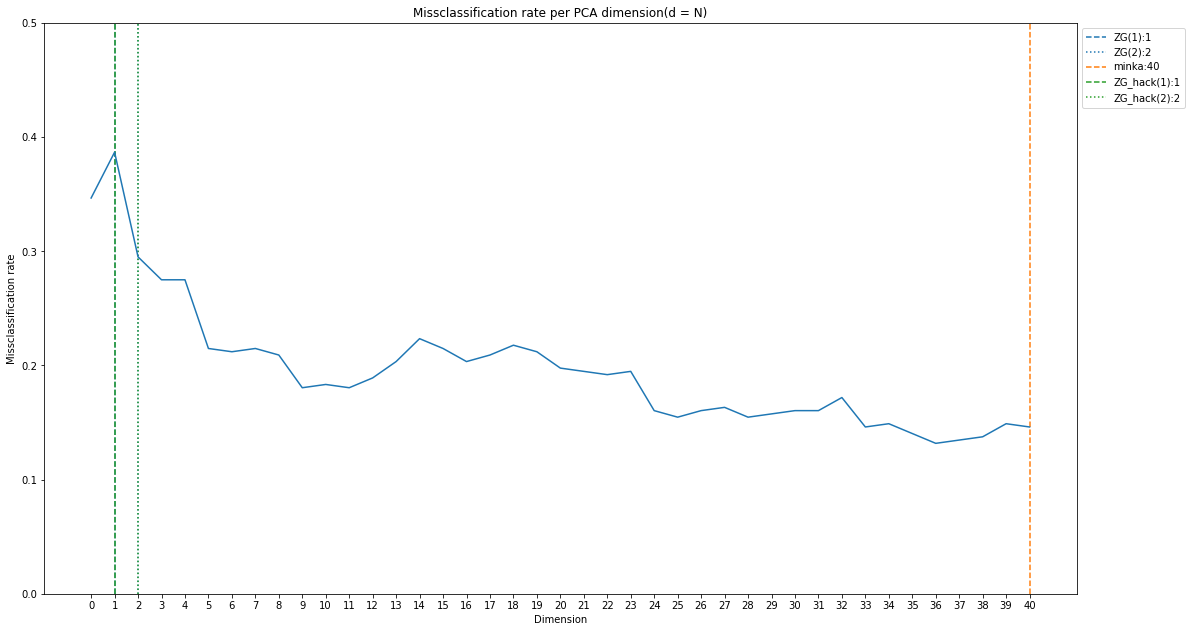

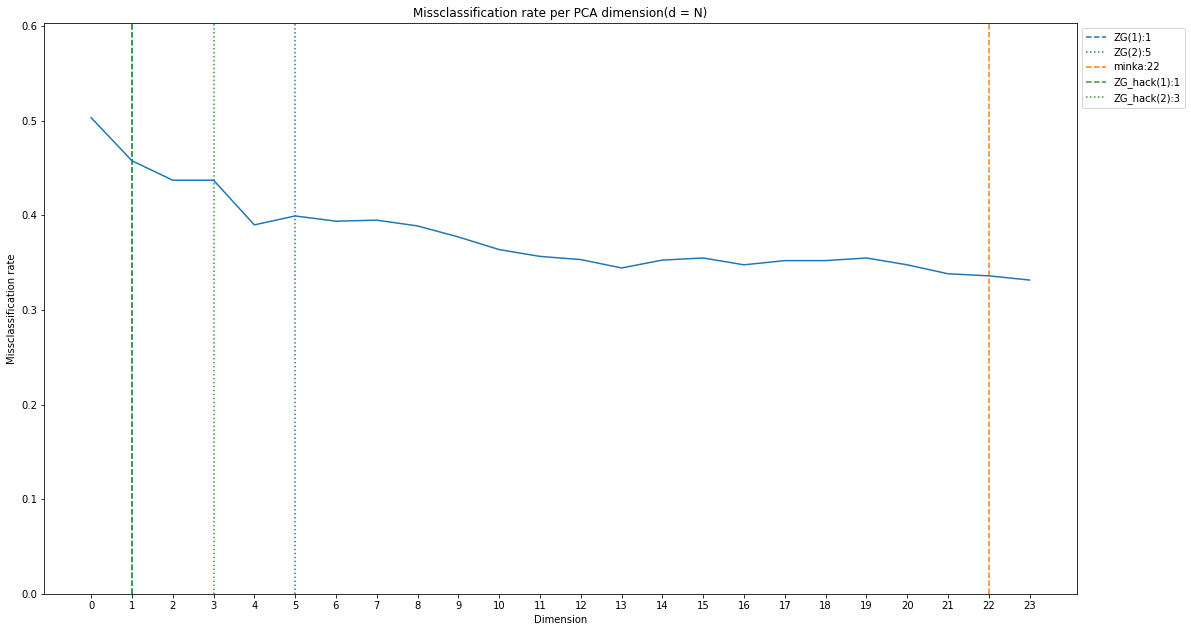

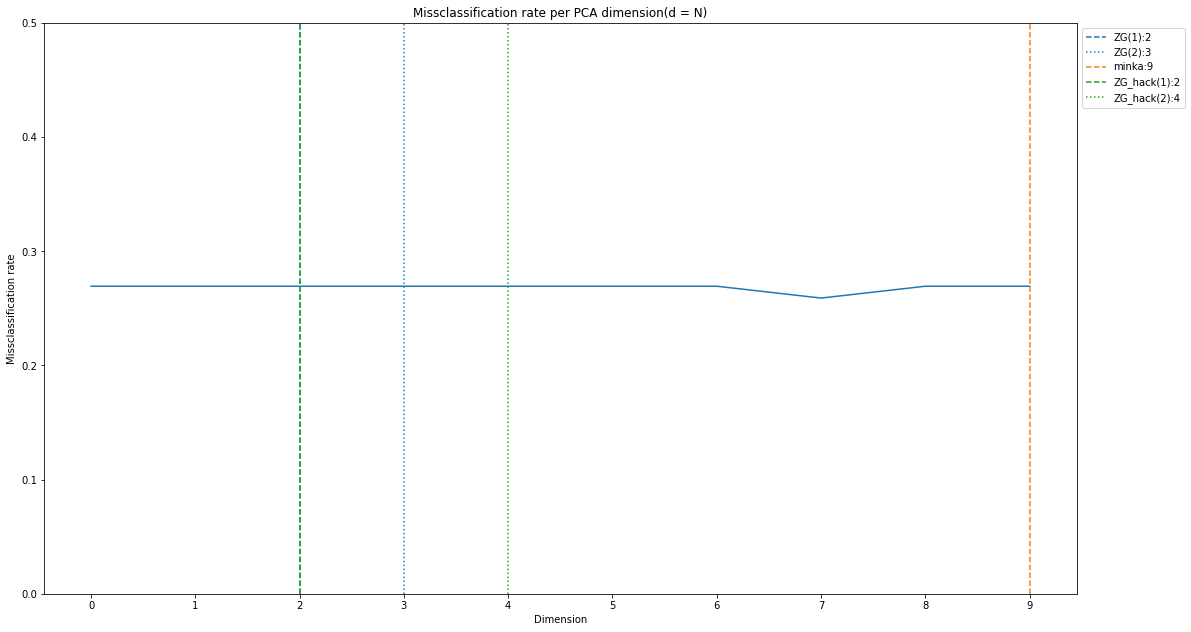

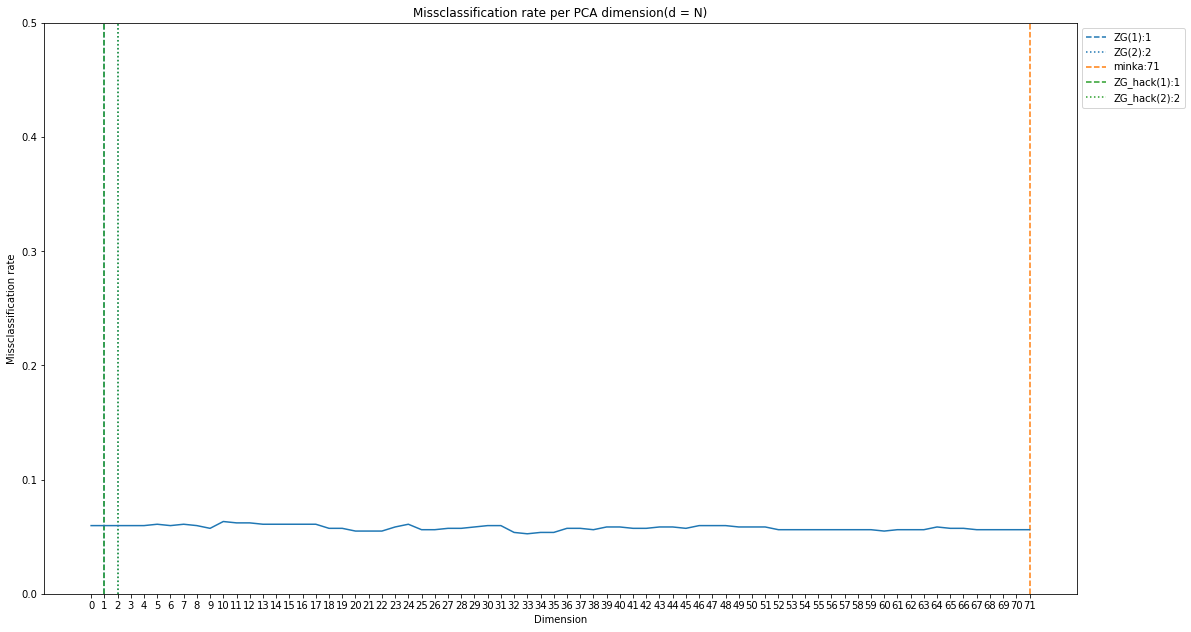

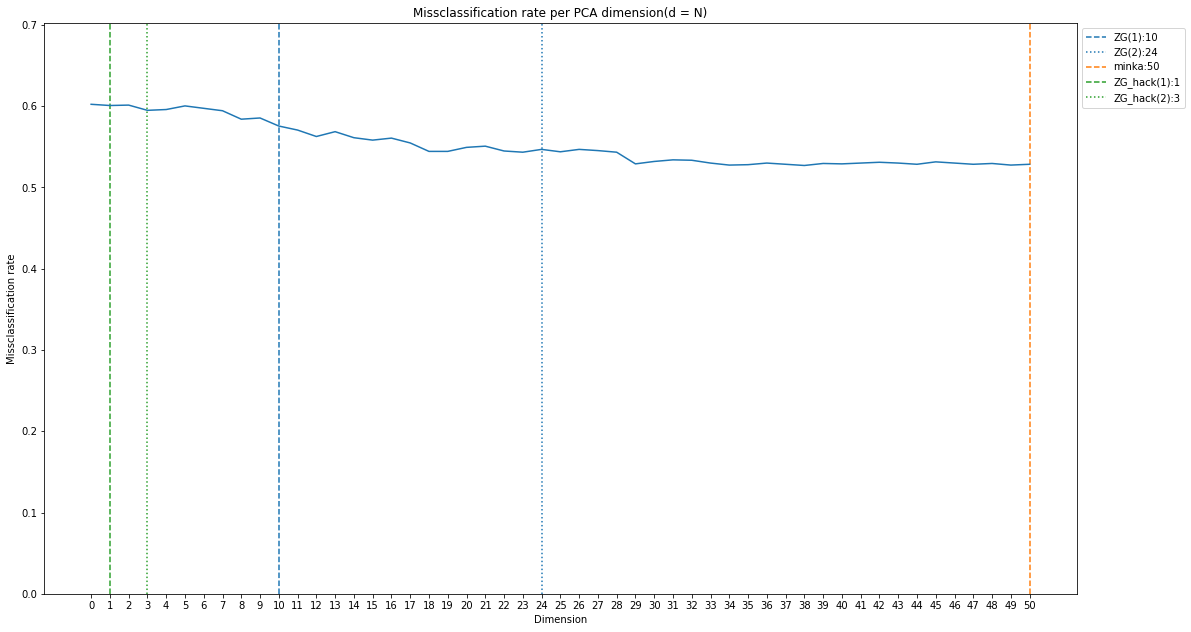

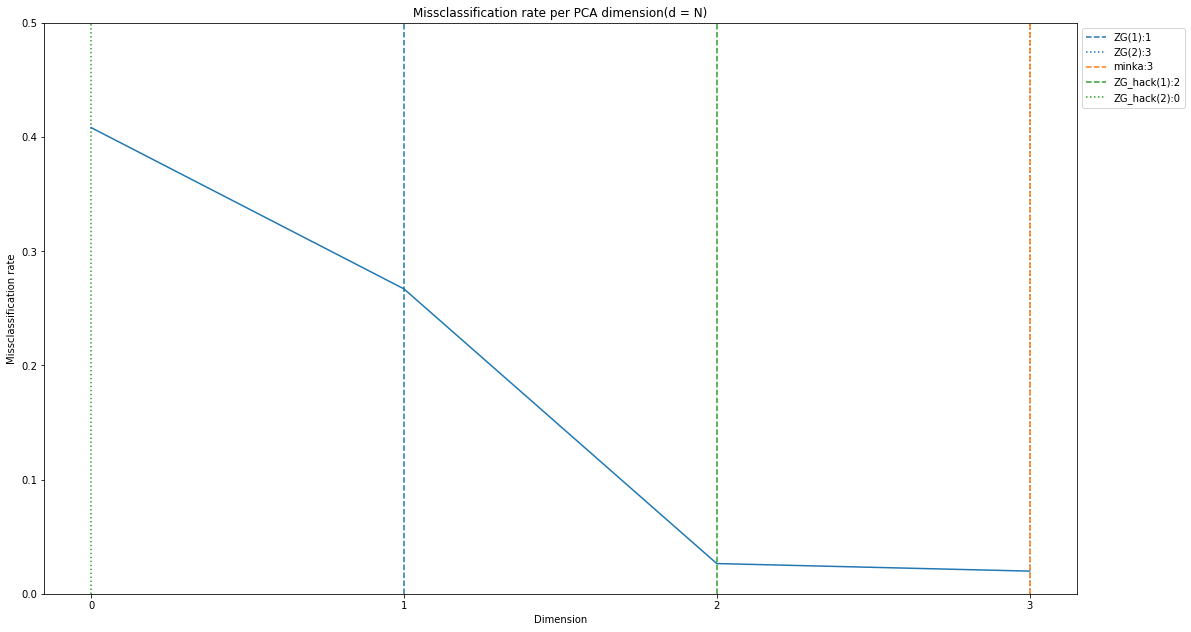

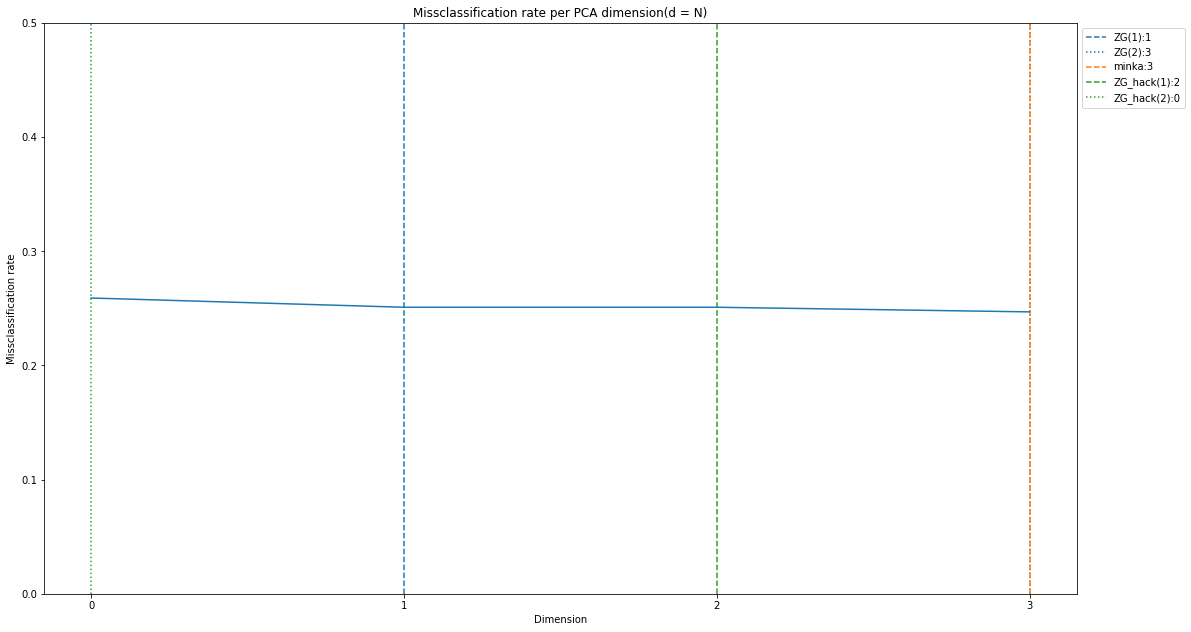

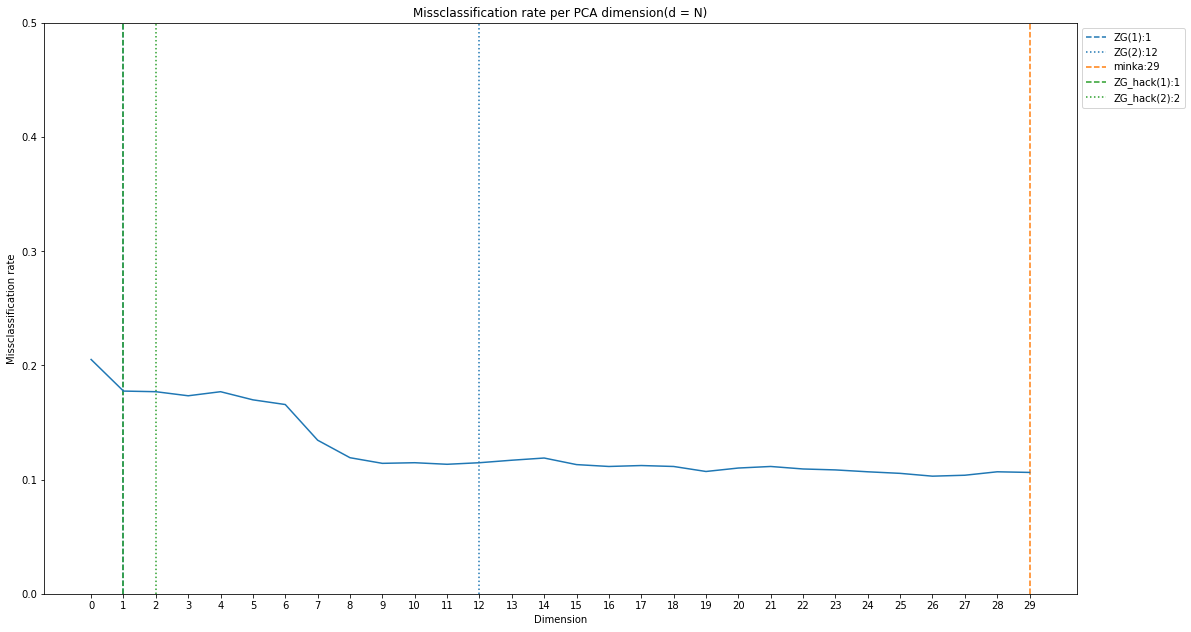

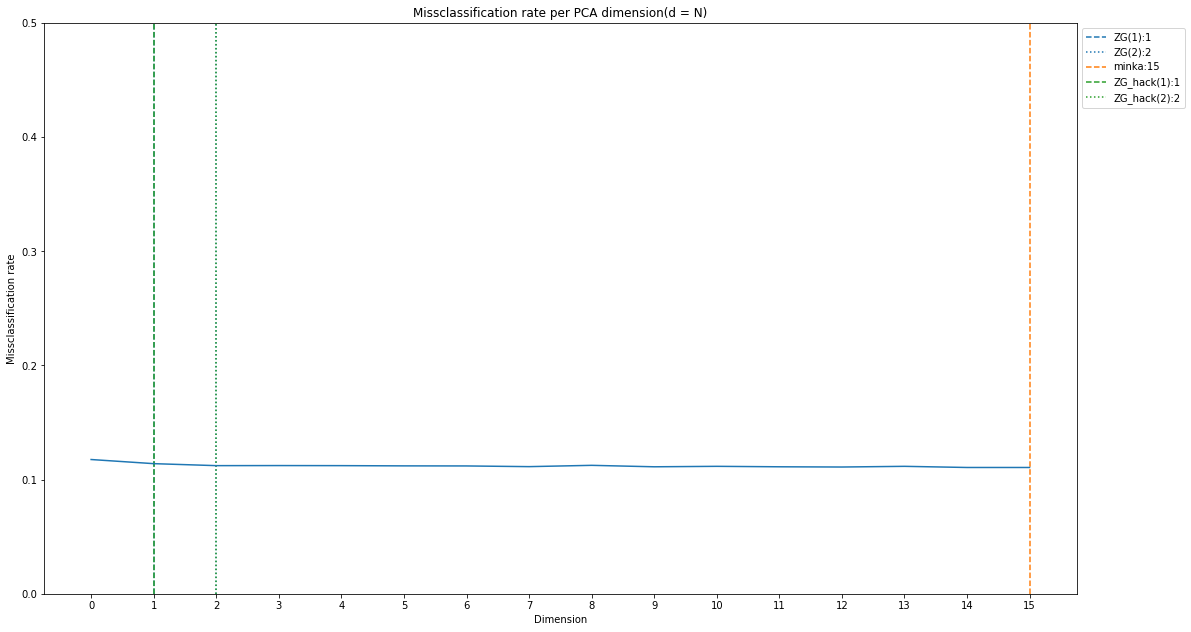

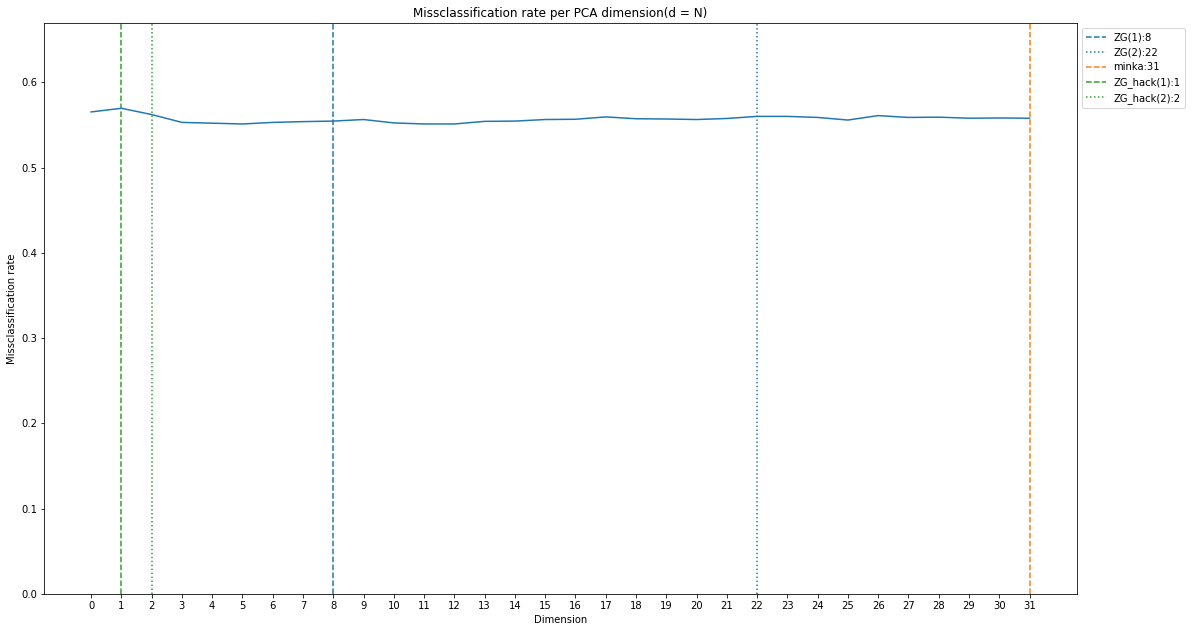

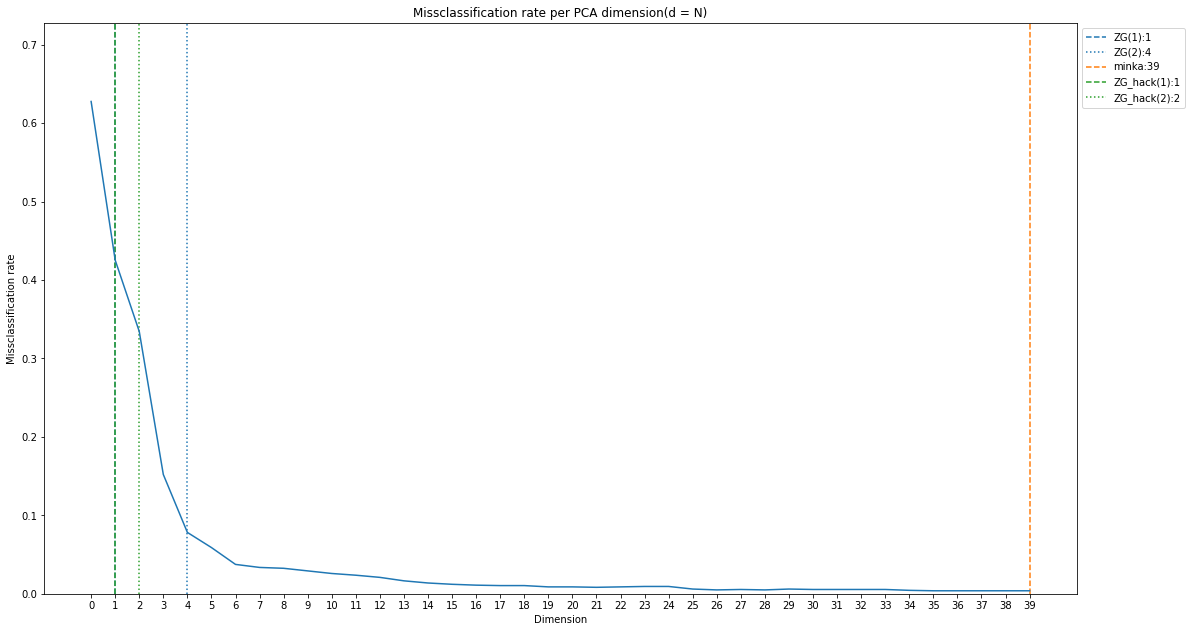

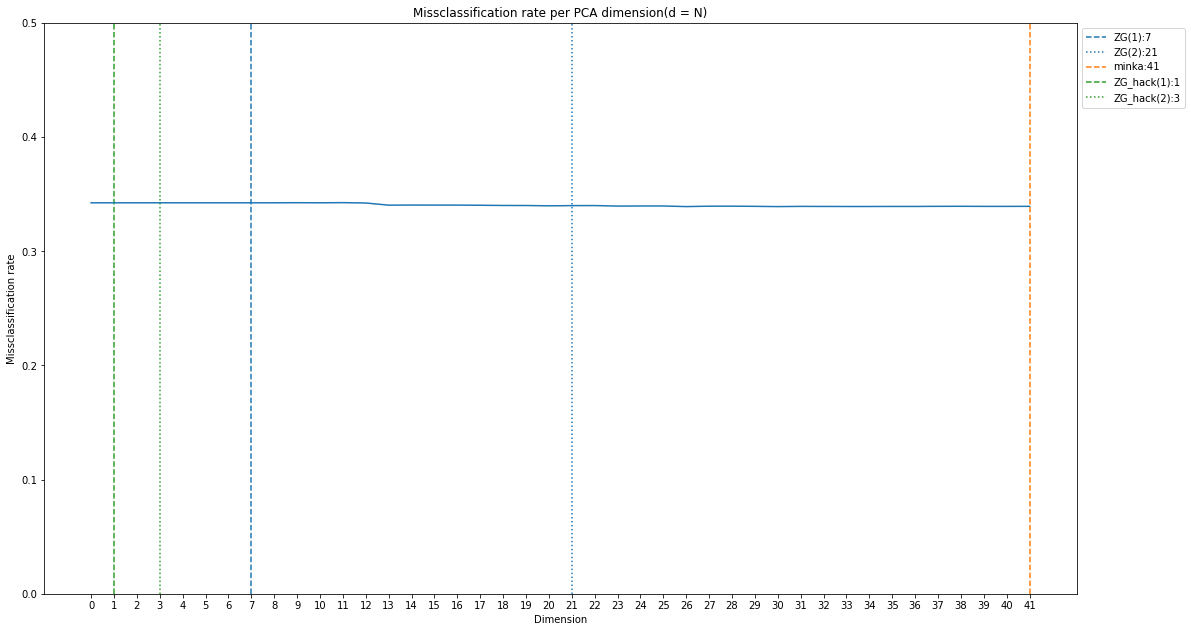

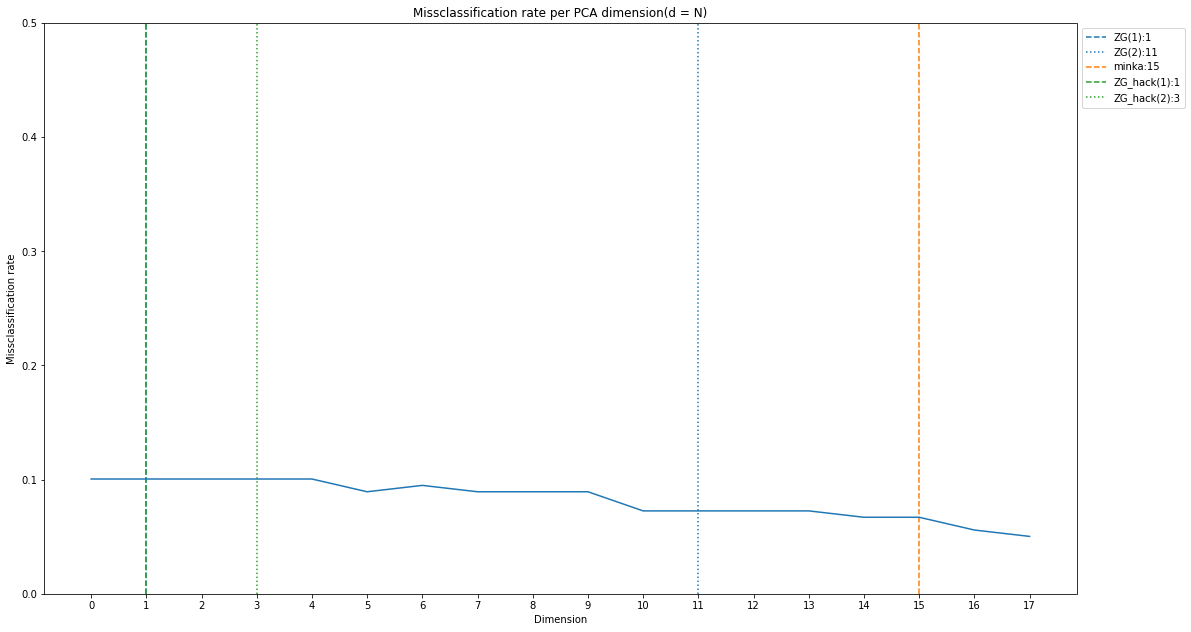

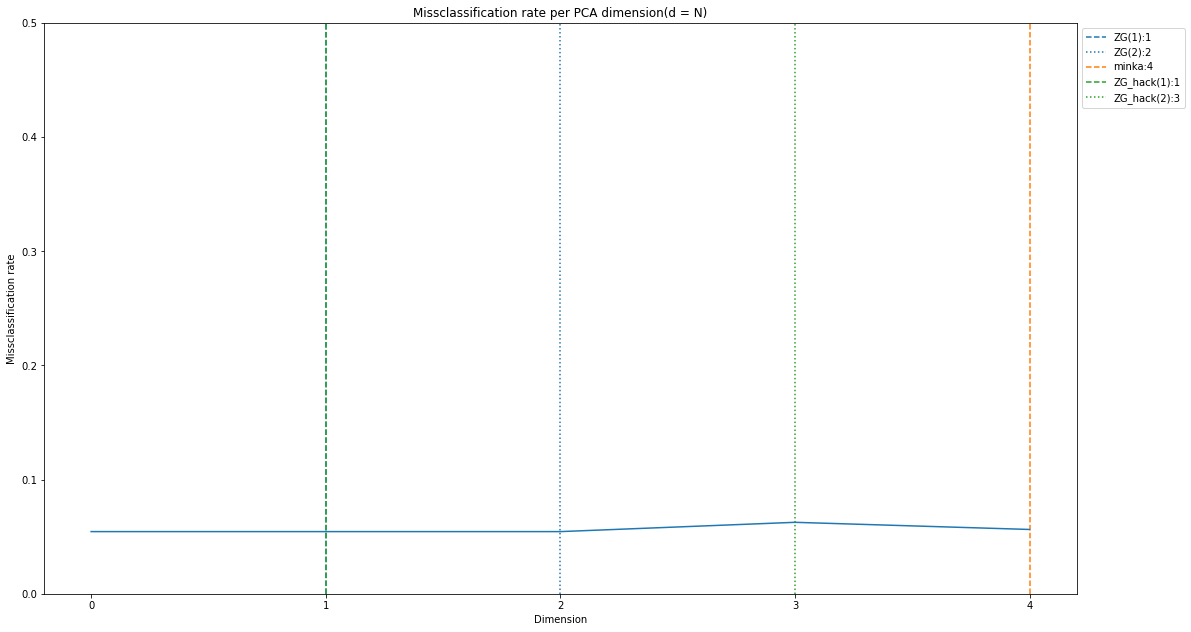

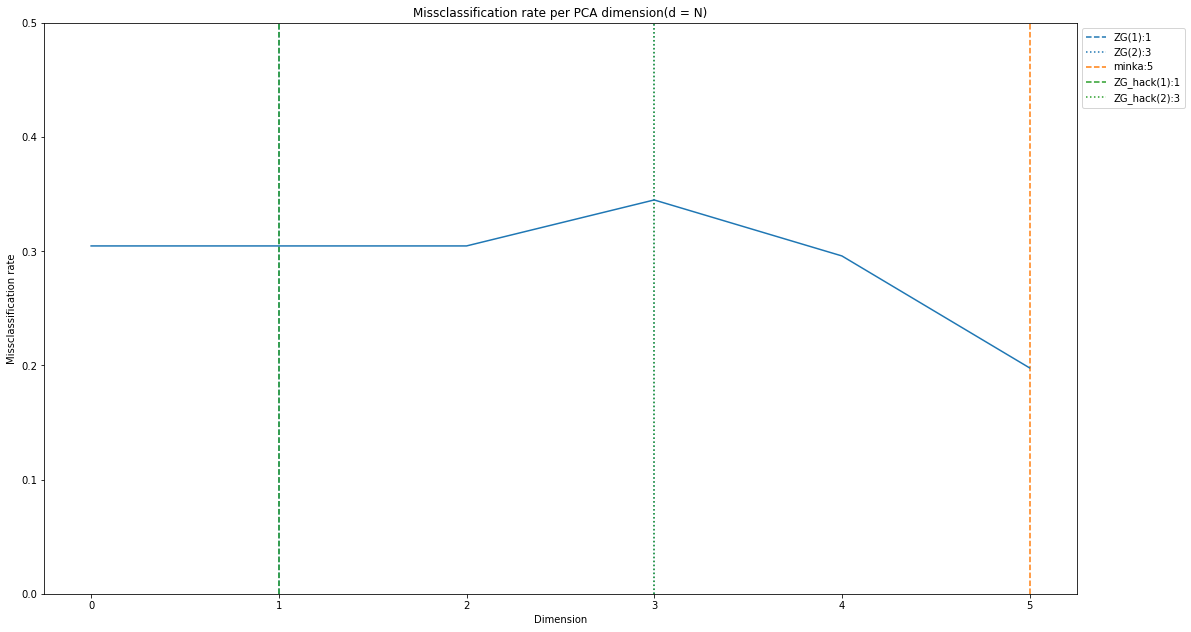

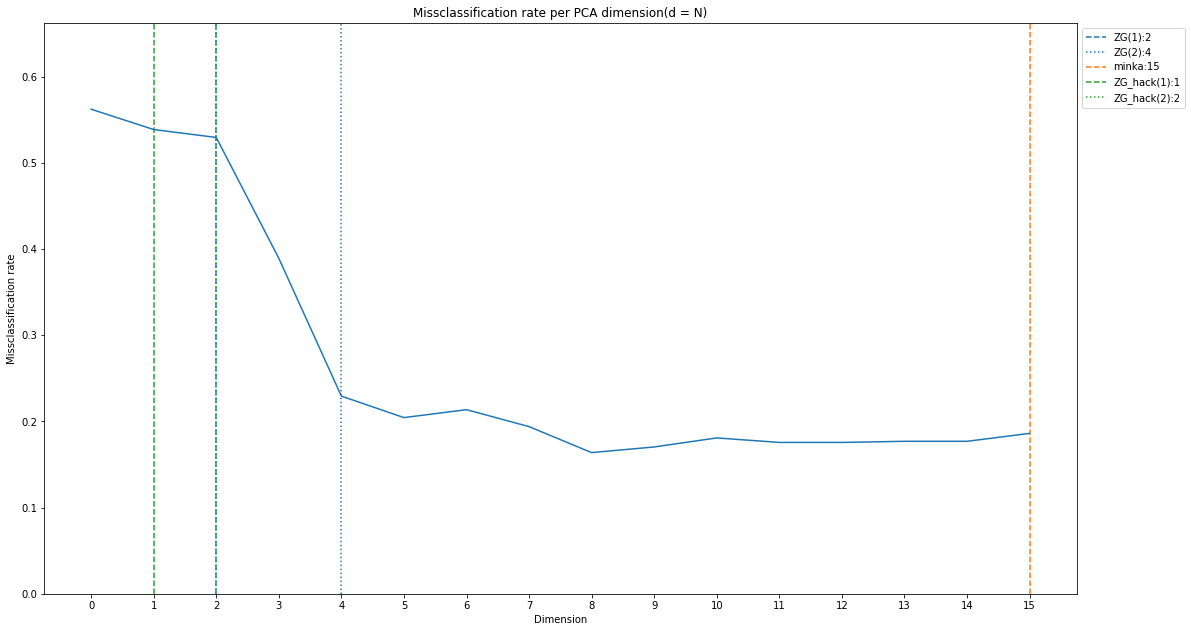

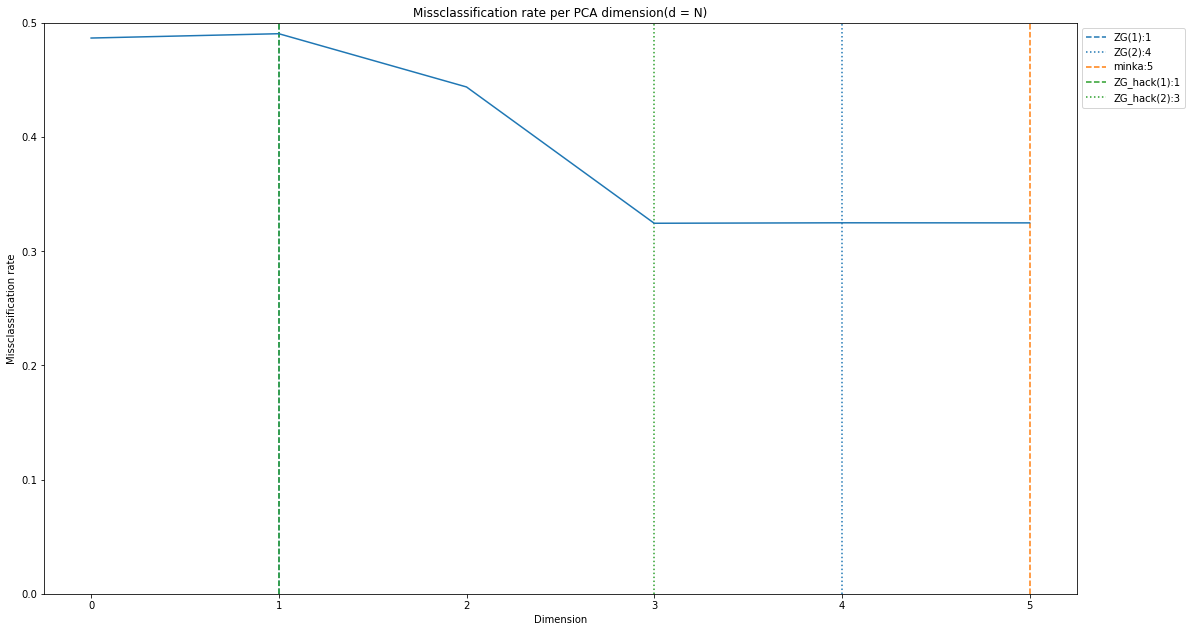

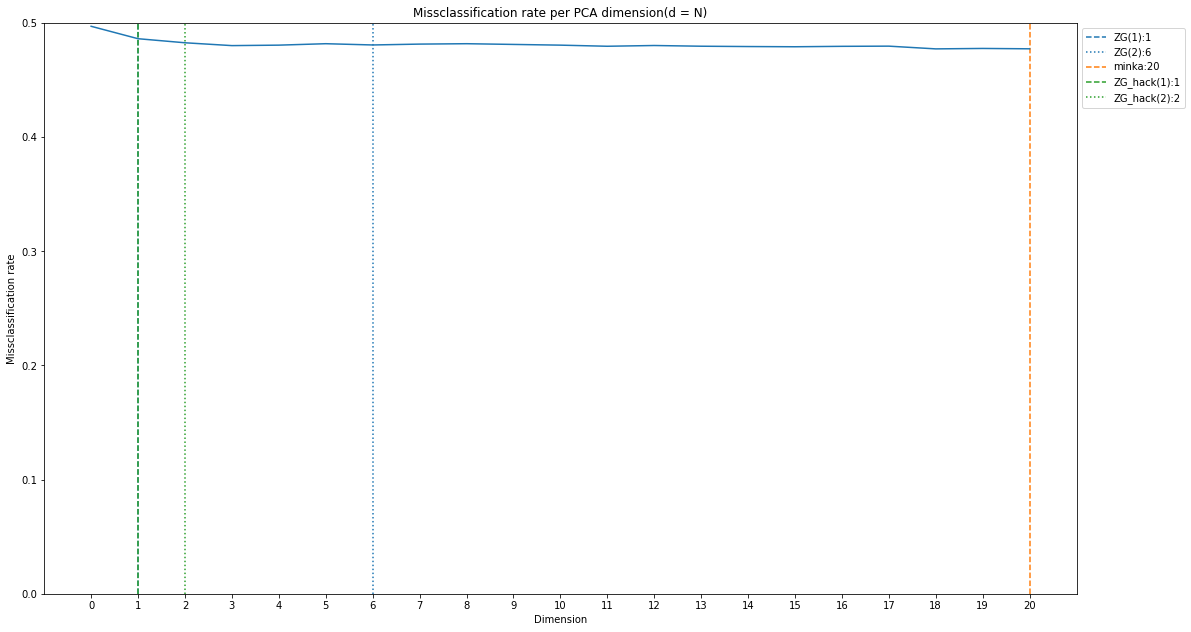

<Figure size 432x288 with 0 Axes>

In [32]:
from matplotlib import pyplot as plt


for i in range(len(all_miss)):
    scree_2(all_miss[i], surv_dims[i])
